# US Spending Drivers Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
data=pd.read_csv("US Spending data.csv")

In [3]:
data.head()

,Spending,Income,State,Dependents,Loan Amount,Work Ex,Age,Tax,Gender,Unemployment Rate
0,8027,140907,Washington,2.0,6699.0,20.0,27.0,28%,F,4.90%
1,8151,189653,Arizona,3.0,47402.0,9.0,45.0,23%,M,5.90%
2,12415,176773,Nevada,8.0,5455.0,23.0,45.0,25%,M,6.30%
3,18005,112169,California,3.0,15396.0,17.0,28.0,35%,F,2.60%
4,4125,58335,Washington,2.0,22004.0,16.0,44.0,28%,M,4.90%


In [4]:
data.columns

Index(['Spending', 'Income', 'State', 'Dependents', 'Loan Amount', 'Work Ex',
       'Age', 'Tax', 'Gender', 'Unemployment Rate'],
      dtype='object')

In [5]:
data.columns = data.columns.str.replace(' ', '_')

In [6]:
data.columns

Index(['Spending', 'Income', 'State', 'Dependents', 'Loan_Amount', 'Work_Ex',
       'Age', 'Tax', 'Gender', 'Unemployment_Rate'],
      dtype='object')

In [7]:
data.isnull().sum()

Spending             0
Income               0
State                0
Dependents           2
Loan_Amount          8
Work_Ex              3
Age                  8
Tax                  0
Gender               3
Unemployment_Rate    3
dtype: int64

### Data Description

In [8]:
data.describe()

,Spending,Income,Dependents,Loan_Amount,Work_Ex,Age
count,1006.000000,1006.000000,1004.000000,998.000000,1003.000000,998.000000
mean,10520.882704,125141.827038,4.084661,25528.509018,12.798604,42.349699
std,5308.738007,43170.099883,2.580277,14203.051595,7.373505,10.332727
min,1204.000000,50027.000000,0.000000,102.000000,0.000000,25.000000
25%,5929.000000,88243.250000,2.000000,13272.250000,6.000000,33.000000
50%,10448.500000,125400.500000,4.000000,26280.000000,13.000000,43.000000
75%,14904.500000,162568.750000,6.000000,37306.750000,19.000000,51.000000
max,19952.000000,199889.000000,8.000000,49977.000000,25.000000,60.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Spending           1006 non-null   int64  
 1   Income             1006 non-null   int64  
 2   State              1006 non-null   object 
 3   Dependents         1004 non-null   float64
 4   Loan_Amount        998 non-null    float64
 5   Work_Ex            1003 non-null   float64
 6   Age                998 non-null    float64
 7   Tax                1006 non-null   object 
 8   Gender             1003 non-null   object 
 9   Unemployment_Rate  1003 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.7+ KB


# Spending

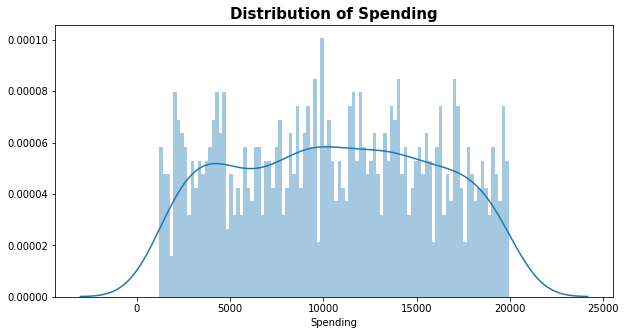

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(data.Spending, bins=100)
plt.title("Distribution of Spending", fontweight="bold", fontsize=15)
plt.show()

### Outliers Check

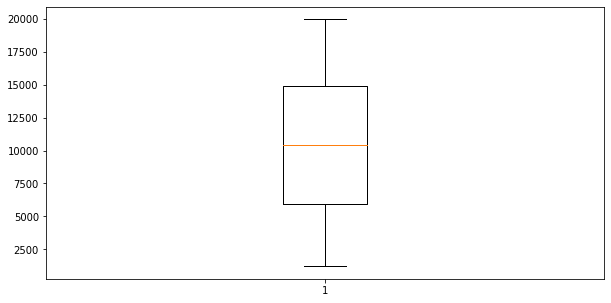

In [11]:
plt.figure(figsize=(10,5))
plt.boxplot(data.Spending)
plt.show()

# Income

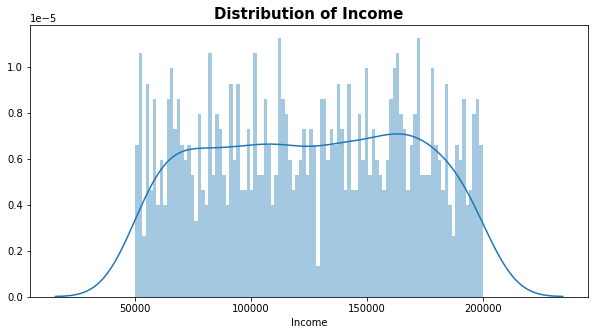

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(data.Income, bins=100)
plt.title("Distribution of Income", fontweight="bold", fontsize=15)
plt.show()

### Outliers Check

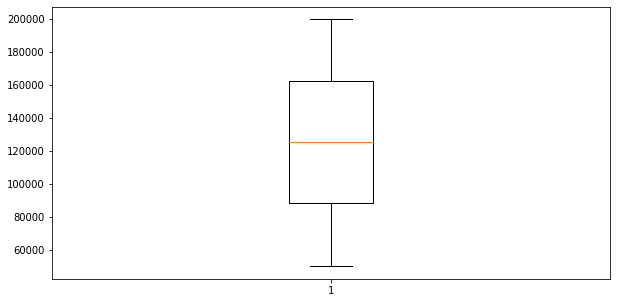

In [13]:
plt.figure(figsize=(10,5))
plt.boxplot(data.Income)
plt.show()

### Leveling Income into Different Category

In [14]:
data['Income'].describe()

count      1006.000000
mean     125141.827038
std       43170.099883
min       50027.000000
25%       88243.250000
50%      125400.500000
75%      162568.750000
max      199889.000000
Name: Income, dtype: float64

In [15]:
Income_Cat=data['Income'].values

In [16]:
Income_Cat[:2]

array([140907, 189653])

In [17]:
data.insert(loc=2, column= 'Income_Cat', value= Income_Cat)

In [18]:
data.loc[(data['Income_Cat']<=100000),'Income_Cat']= 1
data.loc[((data['Income_Cat']>100000) & (data['Income_Cat']<=150000)),'Income_Cat']= 2
data.loc[(data['Income_Cat']>150000),'Income_Cat']= 3

data.Income_Cat.replace([1,2,3],['Low','Medium','High'], inplace=True)

In [19]:
data.Income_Cat.value_counts()

Medium    342
High      336
Low       328
Name: Income_Cat, dtype: int64

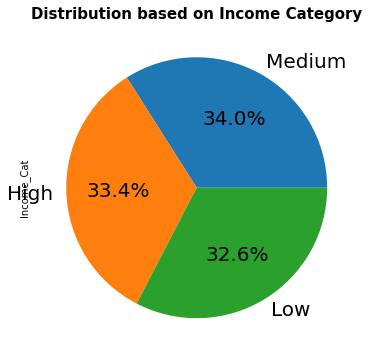

In [20]:
plt.figure(figsize=(6,6))
data["Income_Cat"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title('Distribution based on Income Category', fontweight='bold', fontsize=15)
plt.show()

# State

In [21]:
data.State.value_counts()

California    309
Oregon        297
Arizona       201
Washington    106
Nevada         93
Name: State, dtype: int64

In [22]:
data.State.isnull().sum()

0

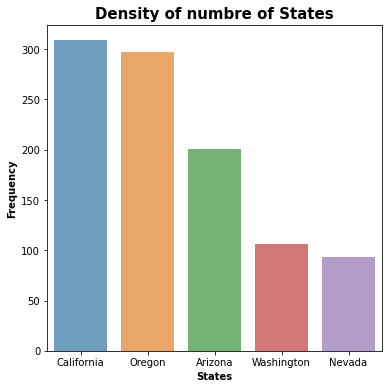

In [23]:
plt.figure(figsize=(6,6))
dep_count  = data['State'].value_counts()
sns.barplot(dep_count.index, dep_count.values, alpha=.7)
plt.title("Density of numbre of States", fontweight="bold", fontsize=15)
plt.xlabel("States", fontweight="bold")
plt.ylabel("Frequency", fontweight="bold")
plt.show()

# Dependents

In [24]:
data.Dependents.value_counts()

6.0    126
4.0    125
8.0    121
0.0    114
3.0    111
5.0    106
7.0    102
2.0    101
1.0     98
Name: Dependents, dtype: int64

### Filling missing values with median

In [25]:
data.Dependents.isnull().sum()

2

In [26]:
data.loc[(data['Dependents'].isnull()),'Dependents']= data.Dependents.median()
data.Dependents.isnull().sum()

0

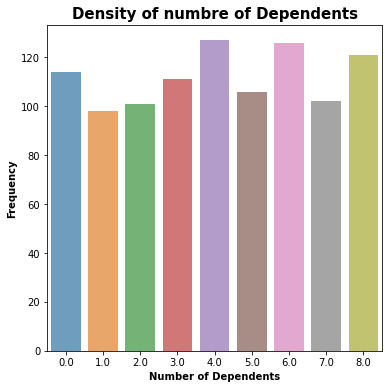

In [27]:
plt.figure(figsize=(6,6))
dep_count  = data['Dependents'].value_counts()
sns.barplot(dep_count.index, dep_count.values, alpha=.7)
plt.title("Density of numbre of Dependents", fontweight="bold", fontsize=15)
plt.xlabel("Number of Dependents", fontweight="bold")
plt.ylabel("Frequency", fontweight="bold")
plt.show()

### Creating Different categories of Dependent frequency

In [28]:
data['Dependents'].describe()

count    1006.000000
mean        4.084493
std         2.577711
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         8.000000
Name: Dependents, dtype: float64

In [29]:
data['Dependents'].value_counts()

4.0    127
6.0    126
8.0    121
0.0    114
3.0    111
5.0    106
7.0    102
2.0    101
1.0     98
Name: Dependents, dtype: int64

In [30]:
Dependents_Cat=data['Dependents'].values

In [31]:
Dependents_Cat[:2]

array([2., 3.])

In [32]:
data.insert(loc=5, column= 'Dependents_Cat', value= Dependents_Cat)

In [33]:
data.loc[(data['Dependents_Cat']<=2),'Dependents_Cat']= 1
data.loc[((data['Dependents_Cat']>2) & (data['Dependents_Cat']<=5)),'Dependents_Cat']= 2
data.loc[(data['Dependents_Cat']>5),'Dependents_Cat']= 3

data.Dependents_Cat.replace([1,2,3],['Low','Medium','High'], inplace=True)

In [34]:
data.Dependents_Cat.value_counts()

High      349
Medium    344
Low       313
Name: Dependents_Cat, dtype: int64

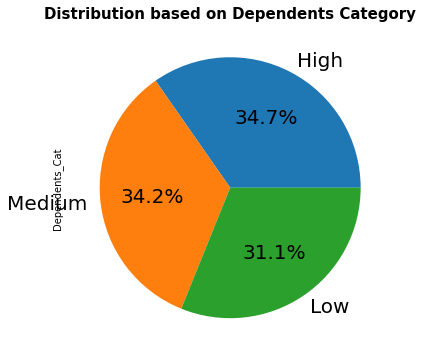

In [35]:
plt.figure(figsize=(6,6))
data["Dependents_Cat"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title('Distribution based on Dependents Category', fontweight='bold', fontsize=15)
plt.show()

# Loan_Amount

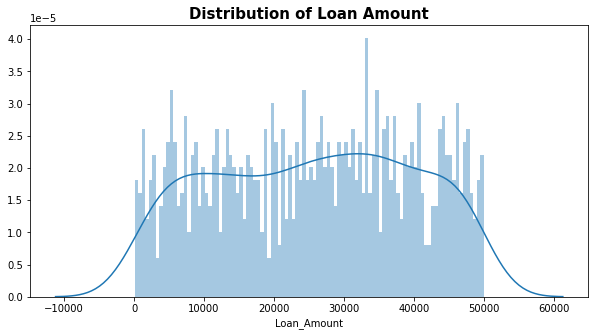

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(data.Loan_Amount, bins=100)
plt.title("Distribution of Loan Amount", fontweight="bold", fontsize=15)
plt.show()

### Filling null values with median

In [37]:
data.Loan_Amount.isnull().sum()

8

In [38]:
data.loc[(data['Loan_Amount'].isnull()),'Loan_Amount']= data.Loan_Amount.median()
data.Loan_Amount.isnull().sum()

0

### Outlier Check

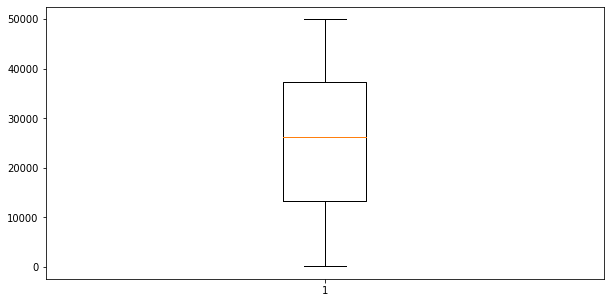

In [39]:
plt.figure(figsize=(10,5))
plt.boxplot(data.Loan_Amount)
plt.show()

### Dividing into categories

In [40]:
data['Loan_Amount'].describe()

count     1006.000000
mean     25534.485089
std      14146.566715
min        102.000000
25%      13336.750000
50%      26280.000000
75%      37281.000000
max      49977.000000
Name: Loan_Amount, dtype: float64

In [41]:
Loan_Cat=data['Loan_Amount'].values

In [42]:
Loan_Cat[:2]

array([ 6699., 47402.])

In [43]:
data.insert(loc=7, column= 'Loan_Cat', value= Loan_Cat)

In [44]:
data.loc[(data['Loan_Cat']<=17000),'Loan_Cat']= 1
data.loc[((data['Loan_Cat']>17000) & (data['Loan_Cat']<=35000)),'Loan_Cat']= 2
data.loc[(data['Loan_Cat']>35000),'Loan_Cat']= 3

data.Loan_Cat.replace([1,2,3],['Low','Medium','High'], inplace=True)

In [45]:
data.Loan_Cat.value_counts()

Medium    387
Low       322
High      297
Name: Loan_Cat, dtype: int64

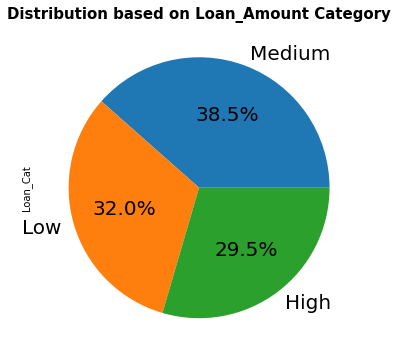

In [46]:
plt.figure(figsize=(6,6))
data["Loan_Cat"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title('Distribution based on Loan_Amount Category', fontweight='bold', fontsize=15)
plt.show()

# Work_Ex

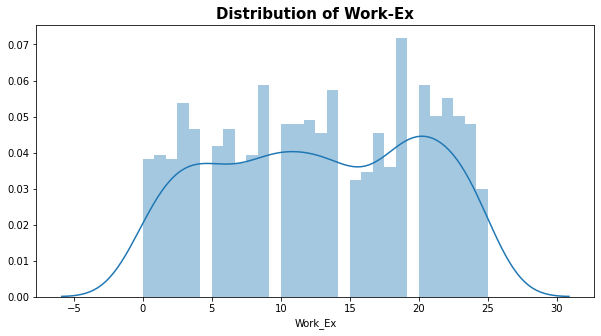

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(data.Work_Ex, bins=30)
plt.title("Distribution of Work-Ex", fontweight="bold", fontsize=15)
plt.show()

### Handling missing values

In [48]:
data.Work_Ex.isnull().sum()

3

In [49]:
data.loc[(data['Work_Ex'].isnull()),'Work_Ex']= data.Work_Ex.median()
data.Work_Ex.isnull().sum()

0

### Checking outliers

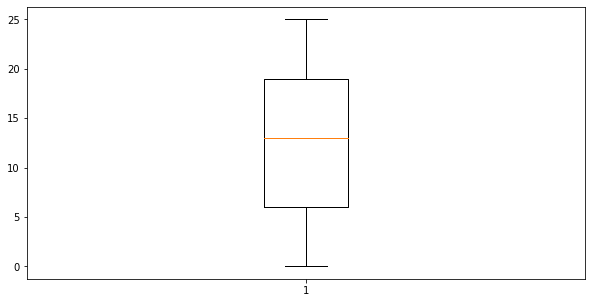

In [50]:
plt.figure(figsize=(10,5))
plt.boxplot(data.Work_Ex)
plt.show()

### Creating different categories for duration of work experience

In [51]:
data.Work_Ex.describe()

count    1006.000000
mean       12.799205
std         7.362500
min         0.000000
25%         6.000000
50%        13.000000
75%        19.000000
max        25.000000
Name: Work_Ex, dtype: float64

In [52]:
Work_Ex_Cat=data['Work_Ex'].values

In [53]:
Work_Ex_Cat[:2]

array([20.,  9.])

In [54]:
data.insert(loc=9, column= 'Work_Ex_Cat', value= Work_Ex_Cat)

In [55]:
data.loc[(data['Work_Ex_Cat']<=8),'Work_Ex_Cat']= 1
data.loc[((data['Work_Ex_Cat']>8) & (data['Work_Ex_Cat']<=16)),'Work_Ex_Cat']= 2
data.loc[(data['Work_Ex_Cat']>16),'Work_Ex_Cat']= 3

data.Work_Ex_Cat.replace([1,2,3],['Low','Medium','High'], inplace=True)

In [56]:
data.Work_Ex_Cat.value_counts()

High      372
Low       319
Medium    315
Name: Work_Ex_Cat, dtype: int64

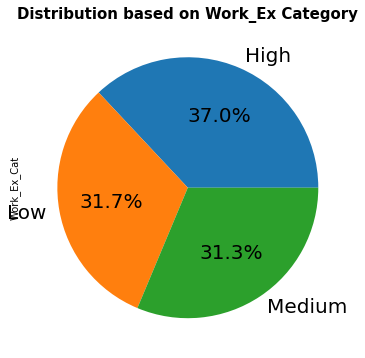

In [57]:
plt.figure(figsize=(6,6))
data["Work_Ex_Cat"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title('Distribution based on Work_Ex Category', fontweight='bold', fontsize=15)
plt.show()

# Age

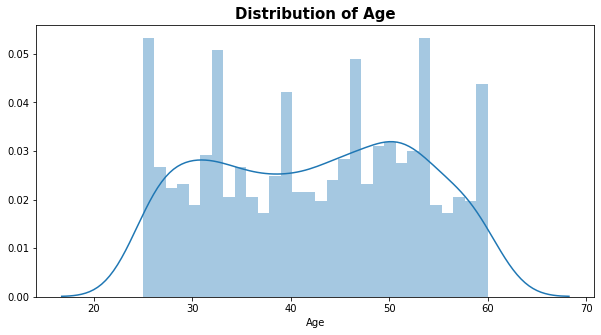

In [58]:
plt.figure(figsize=(10,5))
sns.distplot(data.Age, bins=30)
plt.title("Distribution of Age", fontweight="bold", fontsize=15)
plt.show()

### Handling Missing Values

In [59]:
data.Age.isnull().sum()

8

In [60]:
data.loc[(data['Age'].isnull()),'Age']= data.Age.median()
data.Age.isnull().sum()

0

### Outlier handling

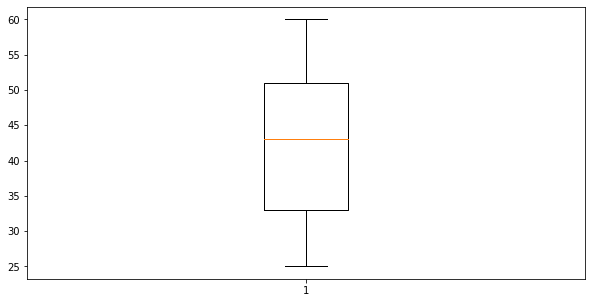

In [61]:
plt.figure(figsize=(10,5))
plt.boxplot(data.Age)
plt.show()

### Dividing into different age group

In [62]:
data.Age.describe()

count    1006.000000
mean       42.354871
std        10.291682
min        25.000000
25%        33.000000
50%        43.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

In [63]:
Age_Cat=data['Age'].values

In [64]:
Age_Cat[:2]

array([27., 45.])

In [65]:
data.insert(loc=11, column= 'Age_Cat', value= Age_Cat)

In [66]:
data.loc[(data['Age_Cat']<=37),'Age_Cat']= 1
data.loc[((data['Age_Cat']>37) & (data['Age_Cat']<=49)),'Age_Cat']= 2
data.loc[(data['Age_Cat']>49),'Age_Cat']= 3

data.Age_Cat.replace([1,2,3],['Low','Medium','High'], inplace=True)

In [67]:
data.Age_Cat.value_counts()

Low       360
Medium    340
High      306
Name: Age_Cat, dtype: int64

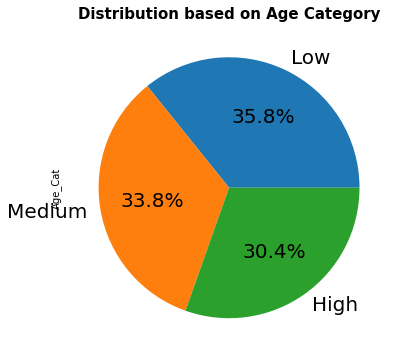

In [68]:
plt.figure(figsize=(6,6))
data["Age_Cat"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title('Distribution based on Age Category', fontweight='bold', fontsize=15)
plt.show()

# Tax

In [69]:
data.Tax.value_counts()

35%    309
20%    297
23%    201
28%    106
25%     93
Name: Tax, dtype: int64

### Handling missing values

In [70]:
data.Tax.isnull().sum()

0

#### Creating categories for tax rate

In [71]:
Tax_cat=data['Tax']

In [72]:
Tax_cat

0       28%
1       23%
2       25%
3       35%
4       28%
       ... 
1001    35%
1002    20%
1003    25%
1004    23%
1005    35%
Name: Tax, Length: 1006, dtype: object

In [73]:
data.insert(loc=9, column='Tax_cat', value=Tax_cat)

In [74]:
data['Tax_cat'].replace(['20%','23%'],'Low',inplace=True)
data['Tax_cat'].replace(['25%','28%'],'Mid',inplace=True)
data['Tax_cat'].replace(['35%'],'High',inplace=True)

In [75]:
data.Tax_cat.value_counts()

Low     498
High    309
Mid     199
Name: Tax_cat, dtype: int64

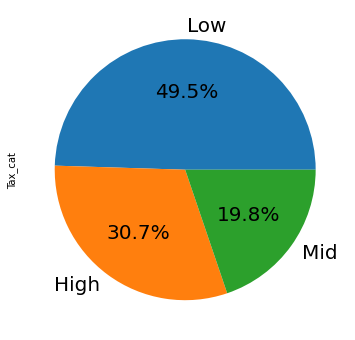

In [76]:
plt.figure(figsize=(6,6))
data.Tax_cat.value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.show()

# Gender

In [77]:
data.Gender.value_counts()

F    556
M    447
Name: Gender, dtype: int64

### Handling missing values

In [78]:
data.Gender.isnull().sum()

3

In [79]:
# data.Gender.mode()
data.loc[(data['Gender'].isnull()),'Gender']= 'F'
data.Gender.isnull().sum()

0

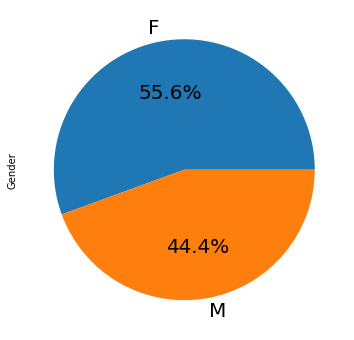

In [80]:
plt.figure(figsize=(6,6))
data.Gender.value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.show()

# Unemployment_Rate

### Handling missing values

In [81]:
data.Unemployment_Rate.isnull().sum()

3

In [82]:
data.Unemployment_Rate.mode()

0    2.60%
dtype: object

In [83]:
data.loc[(data['Unemployment_Rate'].isnull()),'Unemployment_Rate']= '2.60%'
data.Unemployment_Rate.isnull().sum()

0

In [84]:
data.Unemployment_Rate.value_counts()

2.60%    311
8.70%    296
5.90%    201
4.90%    106
6.30%     92
Name: Unemployment_Rate, dtype: int64

### Creating categories for unemployment rate

In [85]:
Unemp_cat=data['Unemployment_Rate']

In [86]:
Unemp_cat[:2]

0    4.90%
1    5.90%
Name: Unemployment_Rate, dtype: object

In [87]:
data.insert(loc=12, column='Unemp_cat', value=Unemp_cat)

In [88]:
data['Unemp_cat'].replace(['2.60%'],'Low',inplace=True)
data['Unemp_cat'].replace(['4.90%','5.90%','6.30%'],'Mid',inplace=True)
data['Unemp_cat'].replace(['8.70%'],'High',inplace=True)

In [89]:
data.Unemp_cat.value_counts()

Mid     399
Low     311
High    296
Name: Unemp_cat, dtype: int64

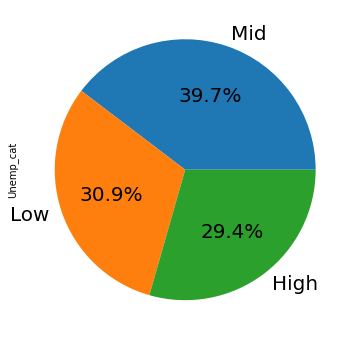

In [90]:
plt.figure(figsize=(6,6))
data.Unemp_cat.value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.show()

In [91]:
data.head(3)

,Spending,Income,Income_Cat,State,Dependents,Dependents_Cat,Loan_Amount,Loan_Cat,Work_Ex,Tax_cat,Work_Ex_Cat,Age,Unemp_cat,Age_Cat,Tax,Gender,Unemployment_Rate
0,8027,140907,Medium,Washington,2.0,Low,6699.0,Low,20.0,Mid,High,27.0,Mid,Low,28%,F,4.90%
1,8151,189653,High,Arizona,3.0,Medium,47402.0,High,9.0,Low,Medium,45.0,Mid,Medium,23%,M,5.90%
2,12415,176773,High,Nevada,8.0,High,5455.0,Low,23.0,Mid,High,45.0,Mid,Medium,25%,M,6.30%


In [92]:
data.columns

Index(['Spending', 'Income', 'Income_Cat', 'State', 'Dependents',
       'Dependents_Cat', 'Loan_Amount', 'Loan_Cat', 'Work_Ex', 'Tax_cat',
       'Work_Ex_Cat', 'Age', 'Unemp_cat', 'Age_Cat', 'Tax', 'Gender',
       'Unemployment_Rate'],
      dtype='object')

### Modified Categorical Data

In [93]:
data1=data[['Spending', 'Income_Cat', 'State',
       'Dependents_Cat', 'Loan_Cat',  'Work_Ex_Cat',
        'Age_Cat', 'Tax_cat', 'Gender',
       'Unemp_cat']]

In [94]:
data1.head(2)

,Spending,Income_Cat,State,Dependents_Cat,Loan_Cat,Work_Ex_Cat,Age_Cat,Tax_cat,Gender,Unemp_cat
0,8027,Medium,Washington,Low,Low,High,Low,Mid,F,Mid
1,8151,High,Arizona,Medium,High,Medium,Medium,Low,M,Mid


In [95]:
data1.to_csv('US Spending_Catagory.csv') 

# Checking correlation

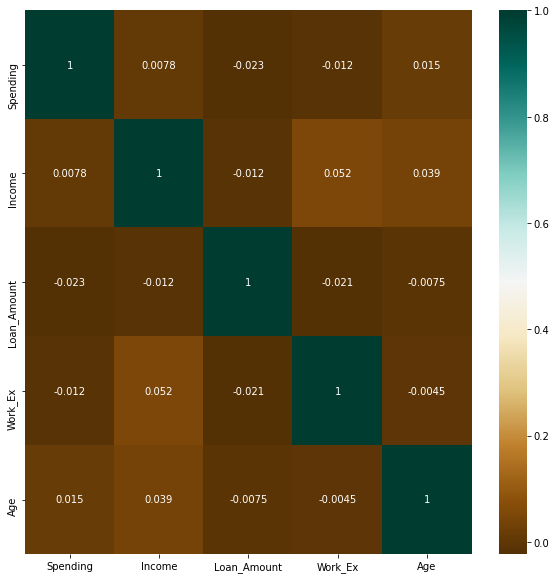

In [96]:
plt.figure(figsize=(10,10))
g=sns.heatmap(data[['Spending','Income', 'Loan_Amount', 'Work_Ex', 'Age']].corr(),cmap="BrBG",annot=True)

# Creating Dummy Veriables for categorical features

In [97]:
data_dum=pd.get_dummies(data1)

In [98]:
data_dum.shape

(1006, 29)

In [99]:
data_dum.head(2)

,Spending,Income_Cat_High,Income_Cat_Low,Income_Cat_Medium,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Dependents_Cat_High,...,Age_Cat_Low,Age_Cat_Medium,Tax_cat_High,Tax_cat_Low,Tax_cat_Mid,Gender_F,Gender_M,Unemp_cat_High,Unemp_cat_Low,Unemp_cat_Mid
0,8027,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1
1,8151,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


# Correlation Matrix

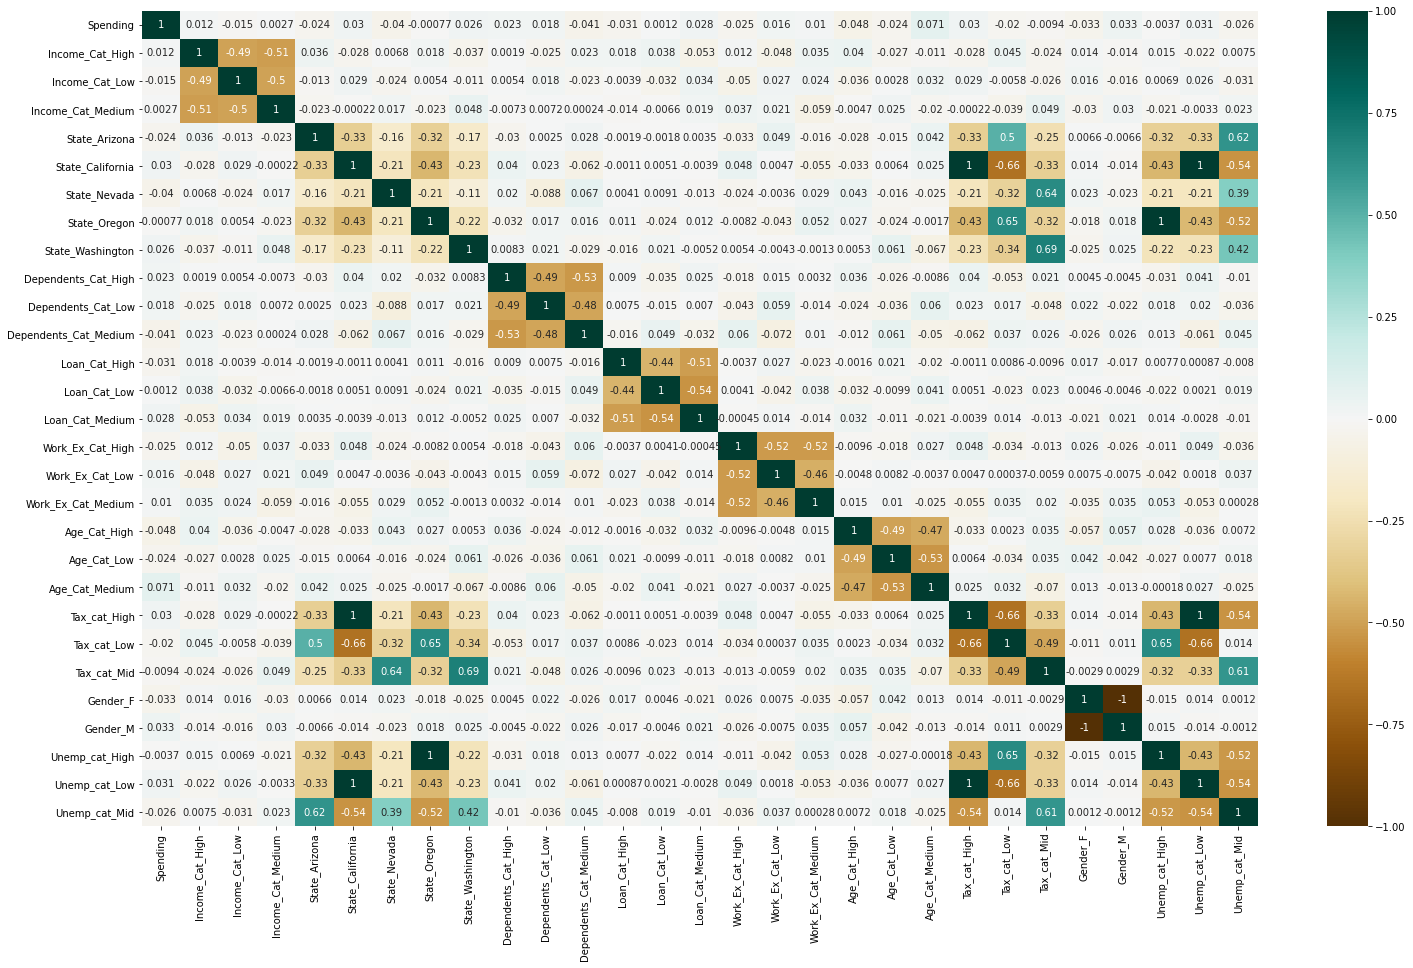

In [100]:
plt.figure(figsize=(25,15))
g=sns.heatmap(data_dum.corr(),cmap="BrBG",annot=True)

# Spending pattern for different factors of spending

# Income vs Spending

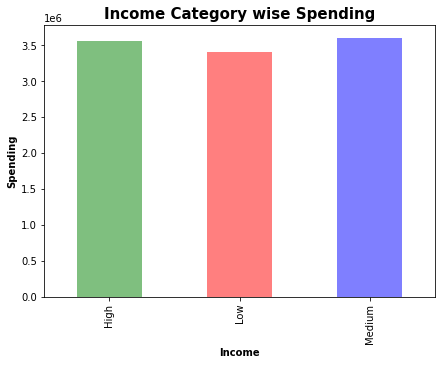

In [102]:
plt.figure(figsize=(7,5))
data1.groupby(['Income_Cat']).sum()['Spending'].plot(kind='bar', color=['green','red', 'blue'], alpha=.5)
plt.title('Income Category wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Income", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# State vs Spending

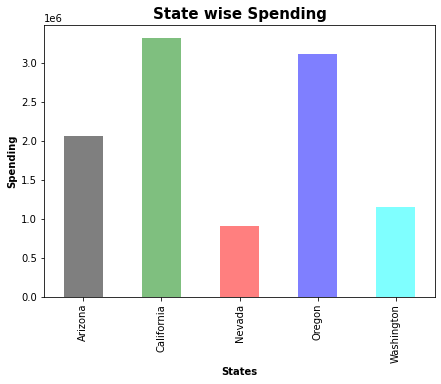

In [103]:
plt.figure(figsize=(7,5))
data1.groupby(['State']).sum()['Spending'].plot(kind='bar', color=['black', 'green','red', 'blue', 'cyan'], alpha=.5)
plt.title('State wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("States", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# Dependents vs Spending

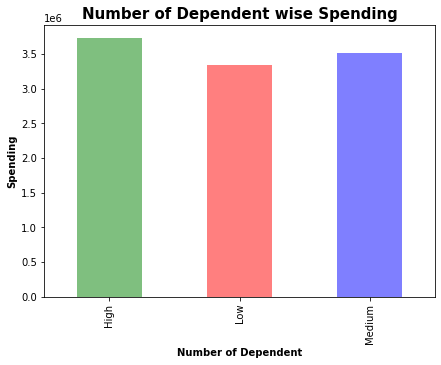

In [104]:
plt.figure(figsize=(7,5))
data1.groupby(['Dependents_Cat']).sum()['Spending'].plot(kind='bar',color=['green','red', 'blue'], alpha=.5)
plt.title('Number of Dependent wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Number of Dependent", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# Loan_Amount vs Spending

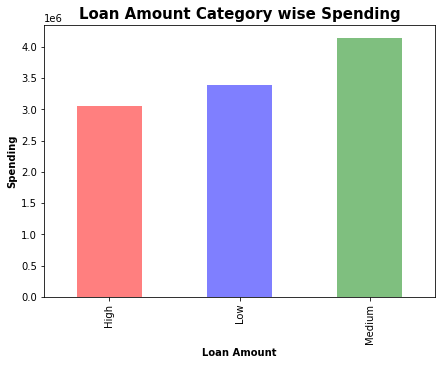

In [105]:
plt.figure(figsize=(7,5))
data1.groupby(['Loan_Cat']).sum()['Spending'].plot(kind='bar',color=['red', 'blue', 'green'],alpha=.5)
plt.title('Loan Amount Category wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Loan Amount", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# Work_Ex vs Spending

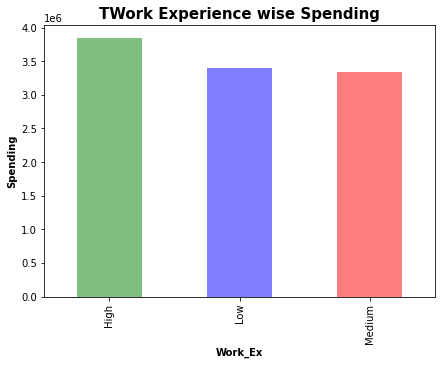

In [106]:
plt.figure(figsize=(7,5))
data1.groupby(['Work_Ex_Cat']).sum()['Spending'].plot(kind='bar',color=['green', 'blue', 'red'],alpha=.5)
plt.title('TWork Experience wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Work_Ex", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# Age vs Spending

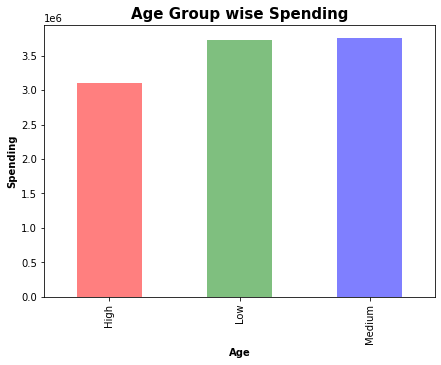

In [107]:
plt.figure(figsize=(7,5))
data1.groupby(['Age_Cat']).sum()['Spending'].plot(kind='bar',color=['red','green', 'blue'],alpha=.5)
plt.title('Age Group wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Age", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# Tax_Rate vs Spending

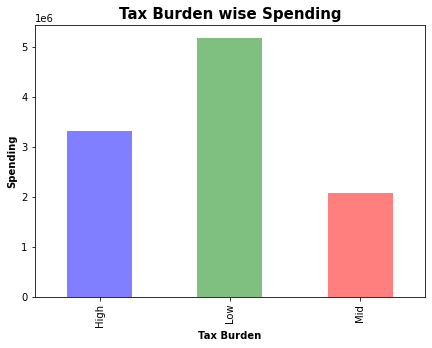

In [108]:
plt.figure(figsize=(7,5))
data1.groupby(['Tax_cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'red'],alpha=.5)
plt.title('Tax Burden wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Tax Burden", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# Gender vs Spending

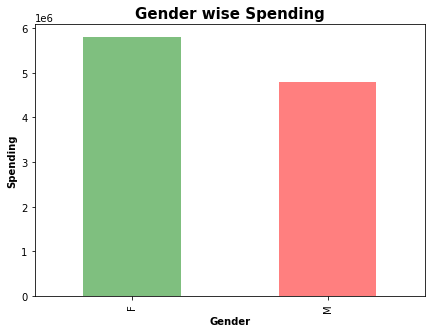

In [109]:
plt.figure(figsize=(7,5))
data1.groupby(['Gender']).sum()['Spending'].plot(kind='bar',color=['green','red'], alpha=.5)
plt.title('Gender wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Gender", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# Unemployment Rate vs Spending

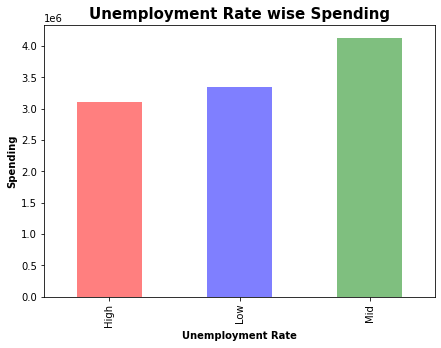

In [110]:
 plt.figure(figsize=(7,5))
data1.groupby(['Unemp_cat']).sum()['Spending'].plot(kind='bar',color=['red', 'blue', 'green'],alpha=.5)
plt.title('Unemployment Rate wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Unemployment Rate", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# PCA

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Covarience Matrix

In [112]:
data[['Spending','Income', 'Loan_Amount', 'Work_Ex', 'Age']].cov()

,Spending,Income,Loan_Amount,Work_Ex,Age
Spending,2.818270e+07,1.785968e+06,-1.697968e+06,-472.198700,831.395895
Income,1.785968e+06,1.863658e+09,-7.479193e+06,16464.287624,17138.299251
Loan_Amount,-1.697968e+06,-7.479193e+06,2.001253e+08,-2177.379116,-1094.507639
Work_Ex,-4.721987e+02,1.646429e+04,-2.177379e+03,54.206407,-0.340613
Age,8.313959e+02,1.713830e+04,-1.094508e+03,-0.340613,105.918718


# Scalling Spending

In [113]:
data_dum['Spending']=StandardScaler().fit_transform(data_dum['Spending'].values.reshape(-1,1))

In [114]:
data_dum.head(2)

,Spending,Income_Cat_High,Income_Cat_Low,Income_Cat_Medium,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Dependents_Cat_High,...,Age_Cat_Low,Age_Cat_Medium,Tax_cat_High,Tax_cat_Low,Tax_cat_Mid,Gender_F,Gender_M,Unemp_cat_High,Unemp_cat_Low,Unemp_cat_Mid
0,-0.470003,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1
1,-0.446634,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


# Covariance Matrix

In [115]:
cov_m=data_dum.cov()

In [116]:
cov_m

,Spending,Income_Cat_High,Income_Cat_Low,Income_Cat_Medium,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Dependents_Cat_High,...,Age_Cat_Low,Age_Cat_Medium,Tax_cat_High,Tax_cat_Low,Tax_cat_Mid,Gender_F,Gender_M,Unemp_cat_High,Unemp_cat_Low,Unemp_cat_Mid
Spending,1.000995,0.005713,-0.006994,0.001281,-0.009674,0.013753,-0.011585,-0.000349,0.007855,0.010919,...,-0.011541,0.033830,0.013753,-0.010023,-0.003729,-0.016427,0.016427,-0.001671,0.014268,-0.012597
Income_Cat_High,0.005713,0.222664,-0.109006,-0.113658,0.006833,-0.006174,0.000934,0.003784,-0.005377,0.000433,...,-0.006208,-0.002546,-0.006174,0.010617,-0.004443,0.003280,-0.003280,0.003122,-0.004849,0.001727
Income_Cat_Low,-0.006994,-0.109006,0.219958,-0.110952,-0.002522,0.006221,-0.003306,0.001159,-0.001553,0.001205,...,0.000621,0.007110,0.006221,-0.001363,-0.004858,0.003723,-0.003723,0.001484,0.005573,-0.007056
Income_Cat_Medium,0.001281,-0.113658,-0.110952,0.224611,-0.004310,-0.000047,0.002372,-0.004943,0.006930,-0.001638,...,0.005586,-0.004564,-0.000047,-0.009254,0.009301,-0.007003,0.007003,-0.004605,-0.000724,0.005329
State_Arizona,-0.009674,0.006833,-0.002522,-0.004310,0.160040,-0.061431,-0.018489,-0.059046,-0.021074,-0.005702,...,-0.002914,0.008027,-0.061431,0.100994,-0.039563,0.001305,-0.001305,-0.058847,-0.061829,0.120676
State_California,0.013753,-0.006174,0.006221,-0.000047,-0.061431,0.213023,-0.028423,-0.090772,-0.032397,0.008758,...,0.001416,0.005539,0.213023,-0.152203,-0.060820,0.003283,-0.003283,-0.090466,0.212412,-0.121946
State_Nevada,-0.011585,0.000934,-0.003306,0.002372,-0.018489,-0.028423,0.083983,-0.027320,-0.009750,0.002723,...,-0.002269,-0.003414,-0.028423,-0.045809,0.074232,0.003307,-0.003307,-0.027228,-0.027612,0.054840
State_Oregon,-0.000349,0.003784,0.001159,-0.004943,-0.059046,-0.090772,-0.027320,0.208276,-0.031139,-0.007000,...,-0.005256,-0.000376,-0.090772,0.149230,-0.058458,-0.004013,0.004013,0.207574,-0.090364,-0.117210
State_Washington,0.007855,-0.005377,-0.001553,0.006930,-0.021074,-0.032397,-0.009750,-0.031139,0.094359,0.001221,...,0.009022,-0.009776,-0.032397,-0.052212,0.084609,-0.003881,0.003881,-0.031034,-0.032606,0.063640
Dependents_Cat_High,0.010919,0.000433,0.001205,-0.001638,-0.005702,0.008758,0.002723,-0.007000,0.001221,0.226791,...,-0.005861,-0.001943,0.008758,-0.012702,0.003944,0.001067,-0.001067,-0.006655,0.009063,-0.002408


# Eigen-Vector Eigen-Value

In [117]:
eig_val, eig_vec=np.linalg.eig(cov_m)

### Eigenvalues

In [162]:
eig_val

array([ 1.02188407e+00+0.00000000e+00j,  9.54971475e-01+0.00000000e+00j,
        6.67298588e-01+0.00000000e+00j,  4.99428144e-01+0.00000000e+00j,
        9.64340373e-02+0.00000000e+00j,  1.92403882e-03+0.00000000e+00j,
        4.38957355e-04+0.00000000e+00j,  3.86741282e-01+0.00000000e+00j,
        2.77942237e-01+0.00000000e+00j,  3.69170658e-01+0.00000000e+00j,
        2.87414466e-01+0.00000000e+00j,  2.97986420e-01+0.00000000e+00j,
        3.07923648e-01+0.00000000e+00j,  3.20097487e-01+0.00000000e+00j,
        3.25202910e-01+0.00000000e+00j,  3.60025892e-01+0.00000000e+00j,
        3.38622175e-01+0.00000000e+00j,  3.52810041e-01+0.00000000e+00j,
       -1.06775557e-15+0.00000000e+00j,  7.46518355e-16+0.00000000e+00j,
       -6.08486583e-16+0.00000000e+00j,  2.67595798e-16+0.00000000e+00j,
        1.75690934e-16+0.00000000e+00j,  1.95699518e-16+0.00000000e+00j,
       -2.72158296e-16+0.00000000e+00j, -5.89812991e-18+1.90967022e-17j,
       -5.89812991e-18-1.90967022e-17j, -1.08477020

### Eigenvectors

In [119]:
eig_vec[5]

array([-0.21424054+0.j,  0.3957844 +0.j, -0.14059089+0.j, -0.01246908+0.j,
       -0.01091723+0.j, -0.34959891+0.j,  0.0958888 +0.j,  0.00508033+0.j,
        0.04688052+0.j,  0.02596391+0.j,  0.02463812+0.j, -0.02977469+0.j,
       -0.03755142+0.j,  0.00889129+0.j,  0.05190912+0.j, -0.00469474+0.j,
       -0.02531462+0.j, -0.01999164+0.j, -0.13210428+0.j, -0.24586959+0.j,
        0.01909628+0.j,  0.0681999 +0.j,  0.11572922+0.j,  0.07821327+0.j,
        0.01147685+0.j,  0.55273295+0.j,  0.55273295-0.j,  0.08570926+0.j,
        0.02781003+0.j])

### PCA Transformation

In [120]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(data_dum)
principalComponents

array([[-0.52910752,  0.20127029,  1.2502289 , -0.66008193,  0.6117503 ],
       [-0.7414735 , -0.49958171,  0.57226367,  0.72818845,  0.5607755 ],
       [ 0.28511475, -0.28255631,  1.17575085,  0.65649179,  0.69684213],
       ...,
       [-0.11860101,  0.01864413,  1.18630505, -0.76531542,  0.07173691],
       [-0.20569193, -0.81760502,  0.63638483,  0.93378807,  0.15966723],
       [-0.46138964,  1.83534213, -0.41071931,  0.79315727,  0.77784067]])

In [121]:
pca = PCA(n_components=2,random_state=50)
principalComponents = pca.fit_transform(data_dum)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])

### Principal Components 

In [122]:
principalComponents

array([[-0.5289302 ,  0.20135409],
       [-0.74147505, -0.49959536],
       [ 0.28502724, -0.28239095],
       ...,
       [-0.11866008,  0.01871598],
       [-0.20570604, -0.81775575],
       [-0.46158203,  1.83532561]])

In [163]:
principalDf.head(2)

,P1,P2
0,-0.528930,0.201354
1,-0.741475,-0.499595


### Scatter plot of PCA Columns

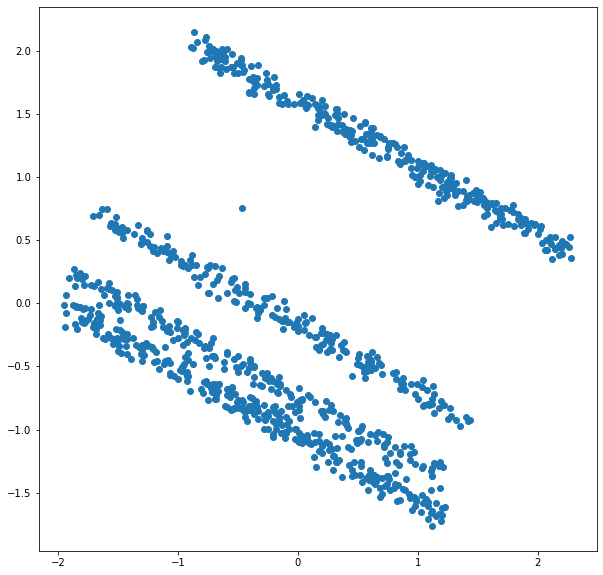

In [124]:
plt.figure(figsize=(10,10))
plt.scatter(principalDf.P1, principalDf.P2)
plt.show()

# 3-Cluster Analysis

# K-Means

In [126]:
from sklearn.cluster import KMeans

### Determining number of clusters

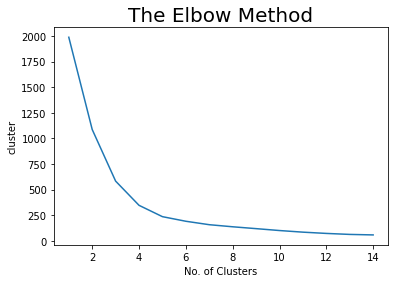

In [127]:

cluster = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(principalDf)
    cluster.append(km.inertia_)
    
plt.plot(range(1, 15), cluster)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('cluster')
plt.show()

### Visualizing cluster formation of PCA data set

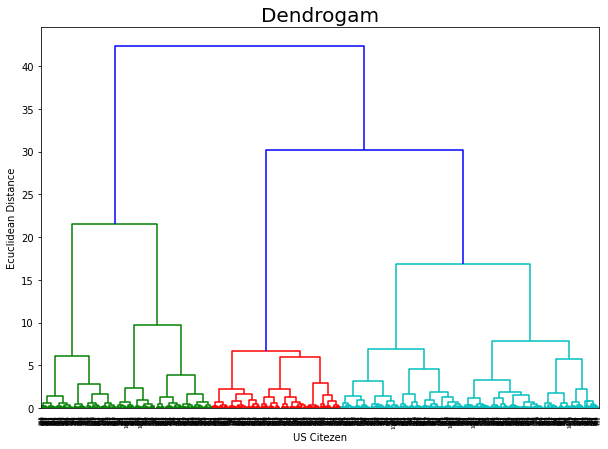

In [128]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(principalDf, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('US Citezen')
plt.ylabel('Ecuclidean Distance')
plt.show()

### K-Means for 3-Clusters on PCA Data Set

In [129]:
kmeans= KMeans(n_clusters=3)

In [130]:
pred=kmeans.fit_predict(principalDf)

In [131]:
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 2], dtype=int32)

In [132]:
kmeans.cluster_centers_

array([[-1.09229699, -0.12891655],
       [ 0.40717107, -0.93222091],
       [ 0.71204865,  1.22928061]])

### Visualizing clusters

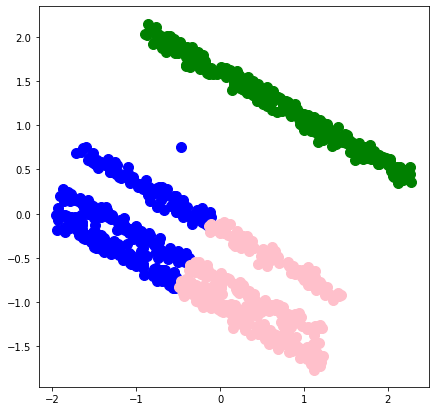

In [133]:
plt.figure(figsize=(7,7))
plt.scatter(principalDf.values[pred == 0,0], principalDf.values[pred == 0,1], s=100, color='blue')
plt.scatter(principalDf.values[pred == 1,0], principalDf.values[pred == 1,1], s=100, color='pink')
plt.scatter(principalDf.values[pred == 2,0], principalDf.values[pred == 2,1], s=100, color='green')
plt.show()

In [134]:
data.head(2)

,Spending,Income,Income_Cat,State,Dependents,Dependents_Cat,Loan_Amount,Loan_Cat,Work_Ex,Tax_cat,Work_Ex_Cat,Age,Unemp_cat,Age_Cat,Tax,Gender,Unemployment_Rate
0,8027,140907,Medium,Washington,2.0,Low,6699.0,Low,20.0,Mid,High,27.0,Mid,Low,28%,F,4.90%
1,8151,189653,High,Arizona,3.0,Medium,47402.0,High,9.0,Low,Medium,45.0,Mid,Medium,23%,M,5.90%


# Leveling Data with Cluster Name [0, 1, 2]

In [135]:
data1.head(2)

,Spending,Income_Cat,State,Dependents_Cat,Loan_Cat,Work_Ex_Cat,Age_Cat,Tax_cat,Gender,Unemp_cat
0,8027,Medium,Washington,Low,Low,High,Low,Mid,F,Mid
1,8151,High,Arizona,Medium,High,Medium,Medium,Low,M,Mid


In [136]:
data1['Cluster']=pred

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
data1.head(2)

,Spending,Income_Cat,State,Dependents_Cat,Loan_Cat,Work_Ex_Cat,Age_Cat,Tax_cat,Gender,Unemp_cat,Cluster
0,8027,Medium,Washington,Low,Low,High,Low,Mid,F,Mid,0
1,8151,High,Arizona,Medium,High,Medium,Medium,Low,M,Mid,0


In [138]:
data1.to_csv('Us Spending Clusters.csv')

### Distribution of 3-Cluster

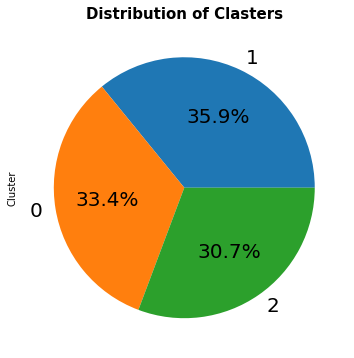

In [178]:
plt.figure(figsize=(6,6))
data1.Cluster.value_counts(normalize=True).plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title('Distribution of Clasters', fontweight='bold', fontsize=15)
plt.show()

### Checking of the cluster where Spending trend is maximum

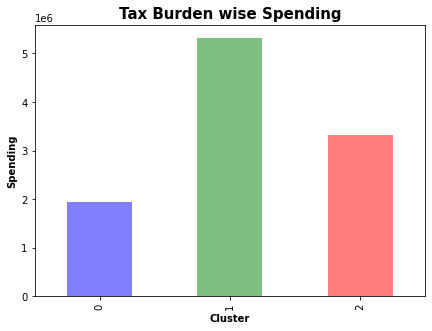

In [140]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'red'],alpha=.5)
plt.title('Tax Burden wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

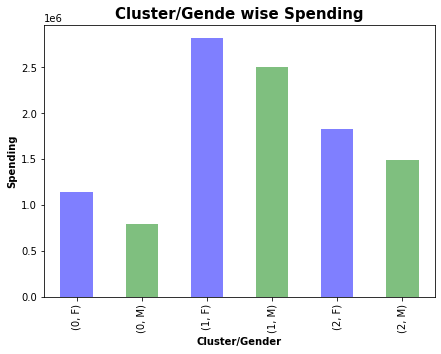

In [166]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Gender']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Gende wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Gender", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

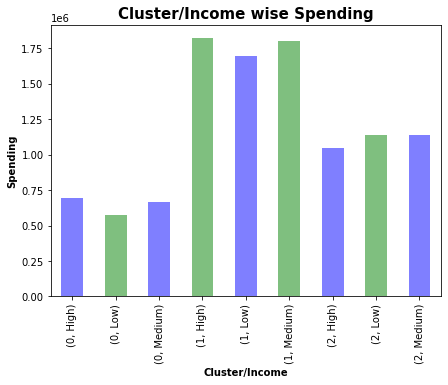

In [169]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Income_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Income wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Income", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

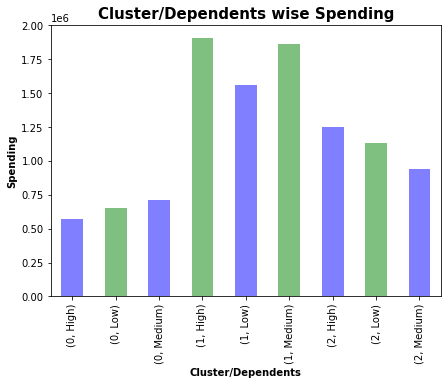

In [170]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Dependents_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Dependents wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Dependents", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

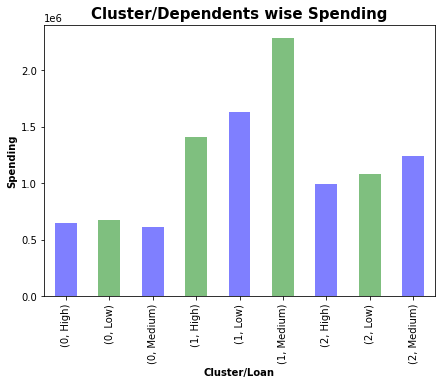

In [171]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Loan_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Dependents wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Loan", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

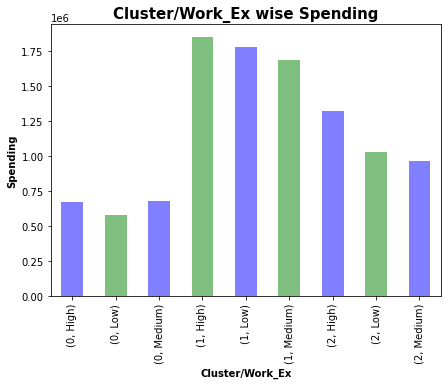

In [172]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Work_Ex_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Work_Ex wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Work_Ex", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

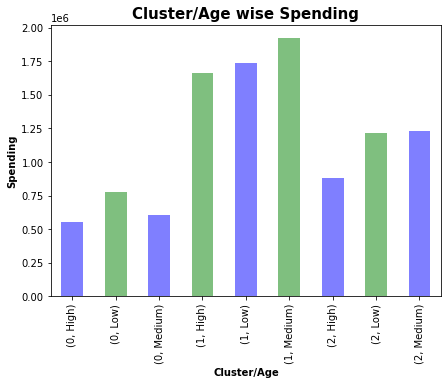

In [173]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Age_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Age wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Age", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

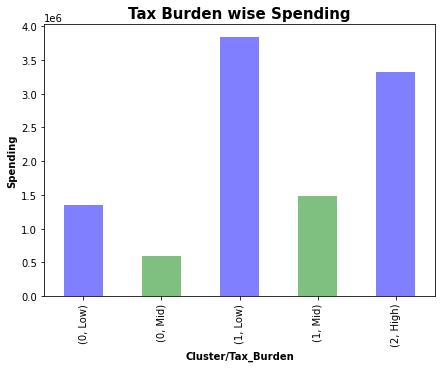

In [176]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Tax_cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Tax Burden wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Tax_Burden", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

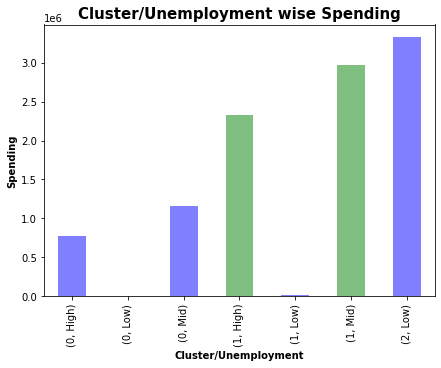

In [177]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Unemp_cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Unemployment wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Unemployment", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# Spending Behaviour of Different factor in Different Cluster

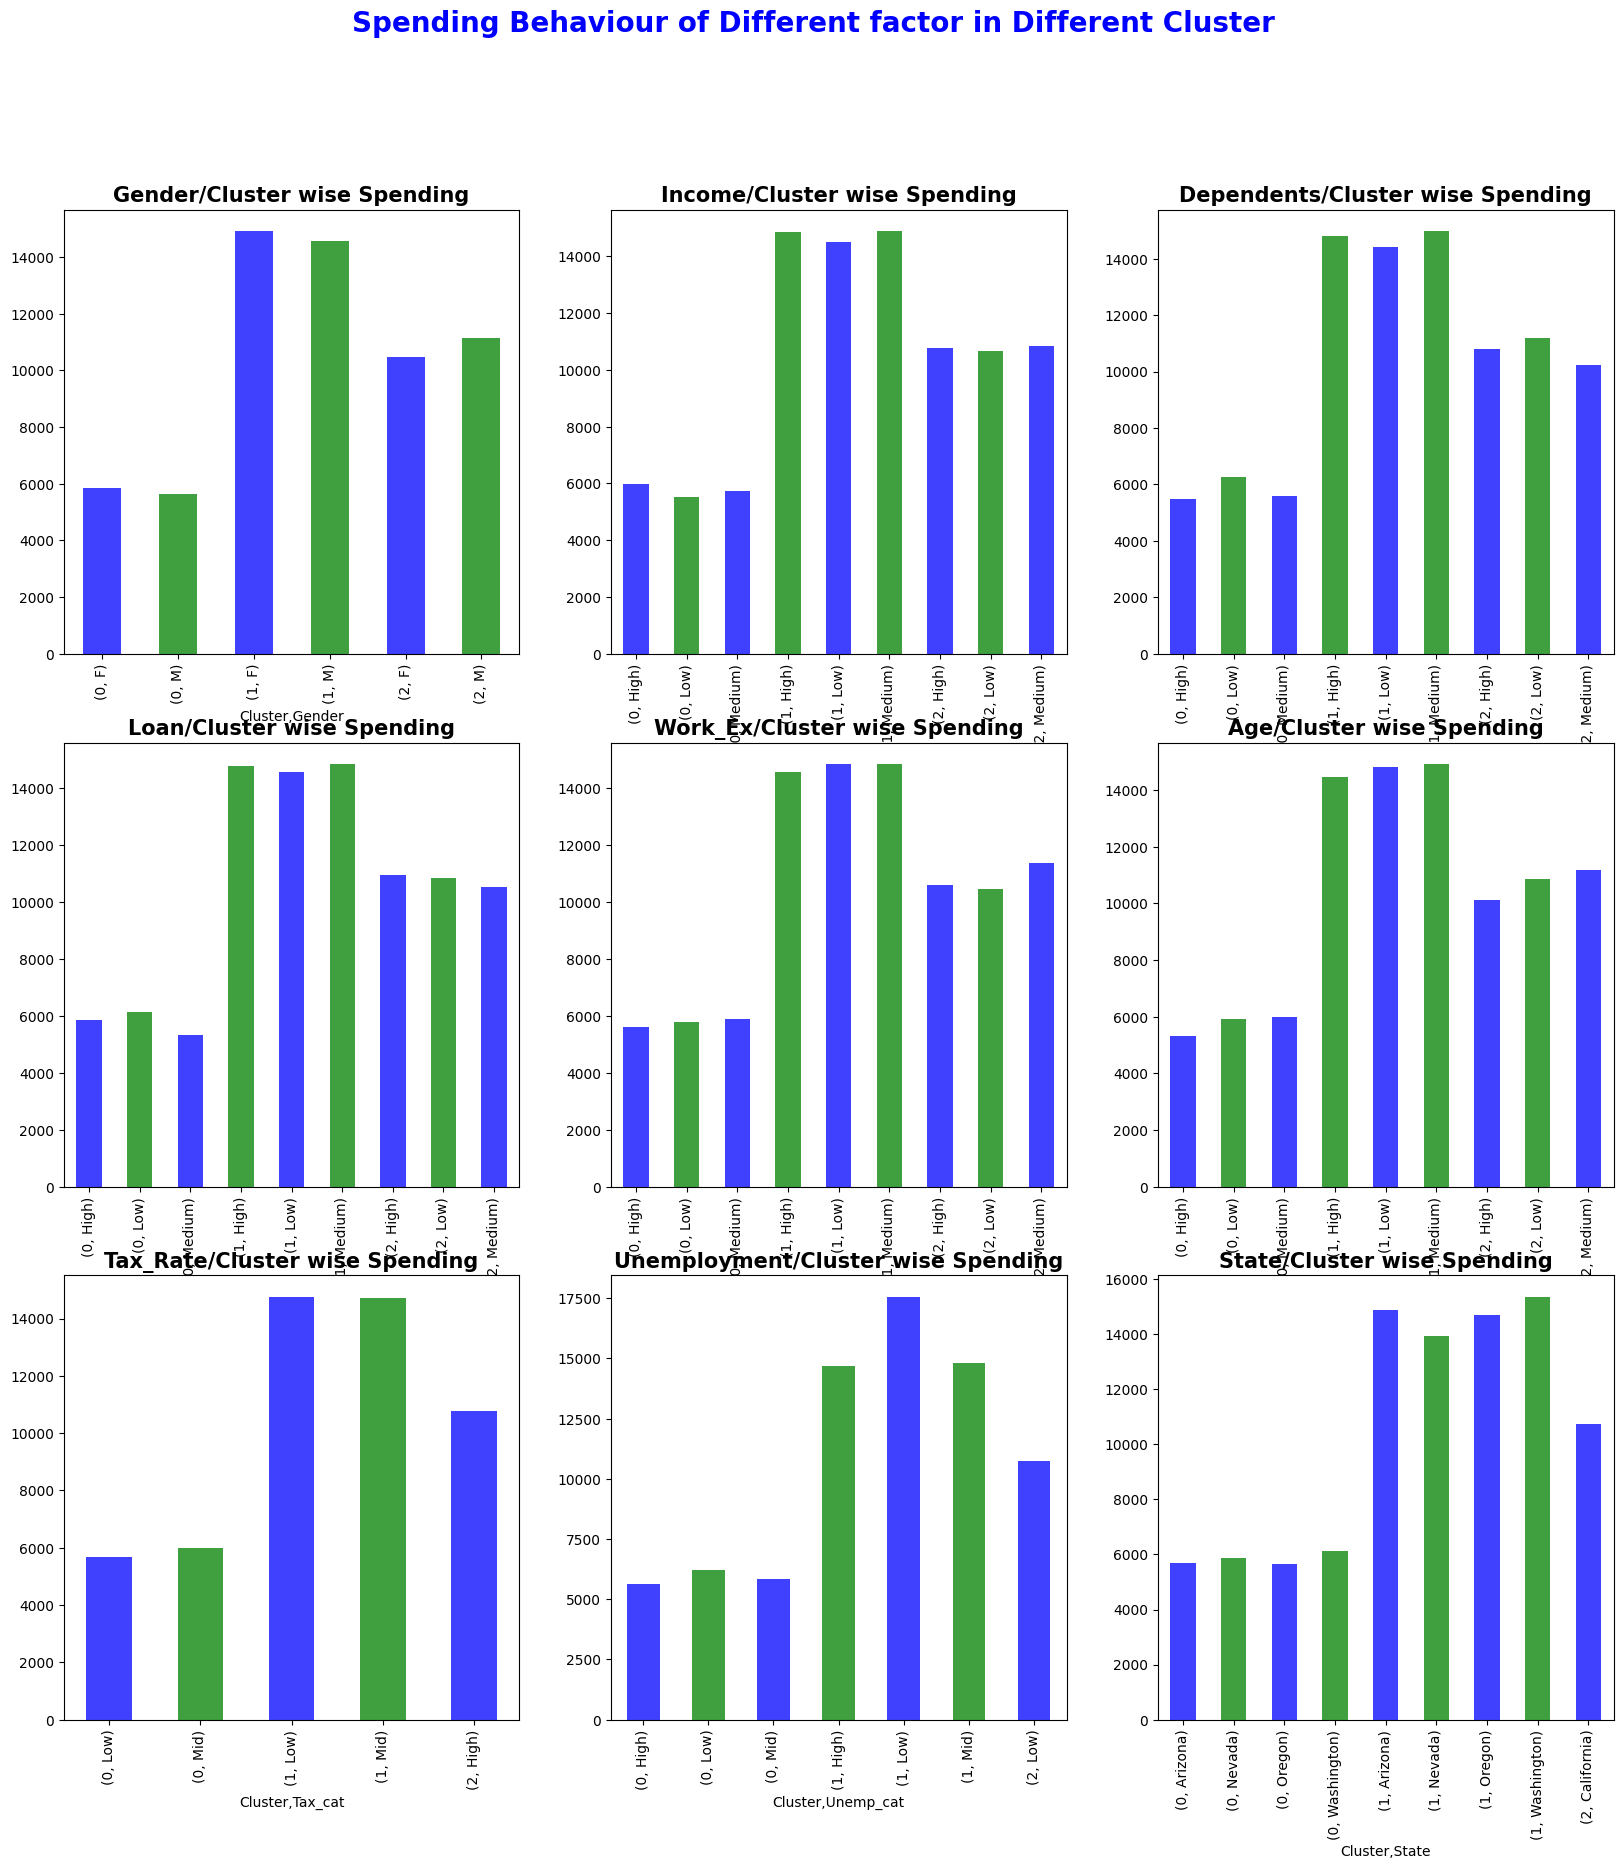

In [274]:
fig , axs = plt.subplots(nrows = 3 , ncols = 3 , figsize = (20,20), dpi=100)
fig.suptitle('Spending Behaviour of Different factor in Different Cluster',fontsize = 20,color='b', fontweight='bold')


data1.groupby(['Cluster','Gender']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75 , ax=axs[0,0])
axs[0,0].set_title("Gender/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Income_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75 , ax=axs[0,1])
axs[0,1].set_title("Income/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Dependents_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,  ax=axs[0,2])
axs[0,2].set_title("Dependents/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Loan_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[1,0])
axs[1,0].set_title("Loan/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Work_Ex_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[1,1])
axs[1,1].set_title("Work_Ex/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Age_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[1,2])
axs[1,2].set_title("Age/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Tax_cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[2,0])
axs[2,0].set_title("Tax_Rate/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Unemp_cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[2,1])
axs[2,1].set_title("Unemployment/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','State']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[2,2])
axs[2,2].set_title("State/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')
plt.show()

In [151]:
data1.columns

Index(['Spending', 'Income_Cat', 'State', 'Dependents_Cat', 'Loan_Cat',
       'Work_Ex_Cat', 'Age_Cat', 'Tax_cat', 'Gender', 'Unemp_cat', 'Cluster'],
      dtype='object')

### Findings:
    - From above we can say that Cluster-1 shows higher spending Behaviour.
    - Now, we have to check how demography of Cluster-1 is different from other cluster

# Cluster wise demographic Distribution

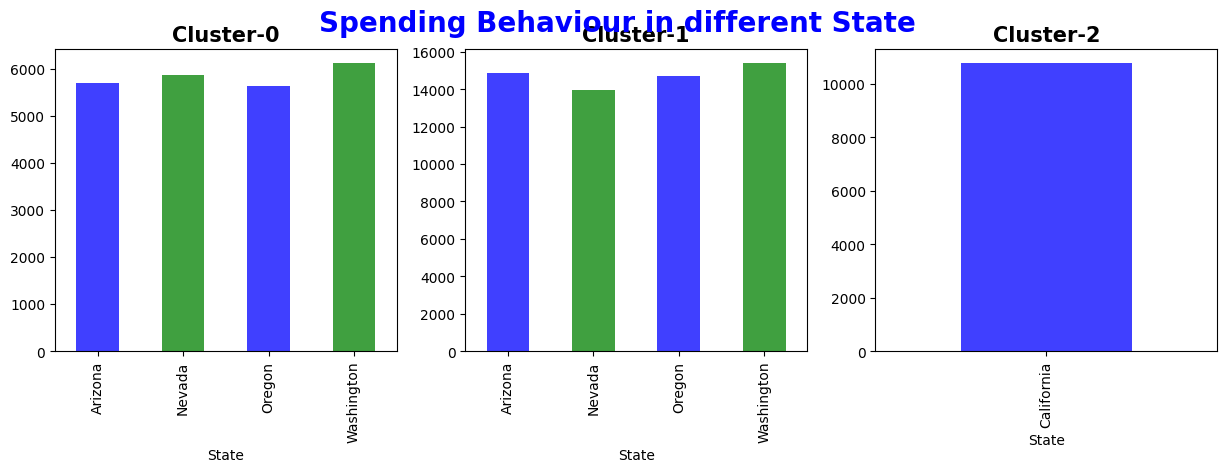

In [319]:
fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,4), dpi=100)
fig.suptitle('Spending Behaviour in different State',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].groupby(['State'])['Spending'].mean().plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,ax=axs[0])
axs[0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].groupby(['State'])['Spending'].mean().plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,ax=axs[1])
axs[1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].groupby(['State'])['Spending'].mean().plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,ax=axs[2])
axs[2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')
plt.show()

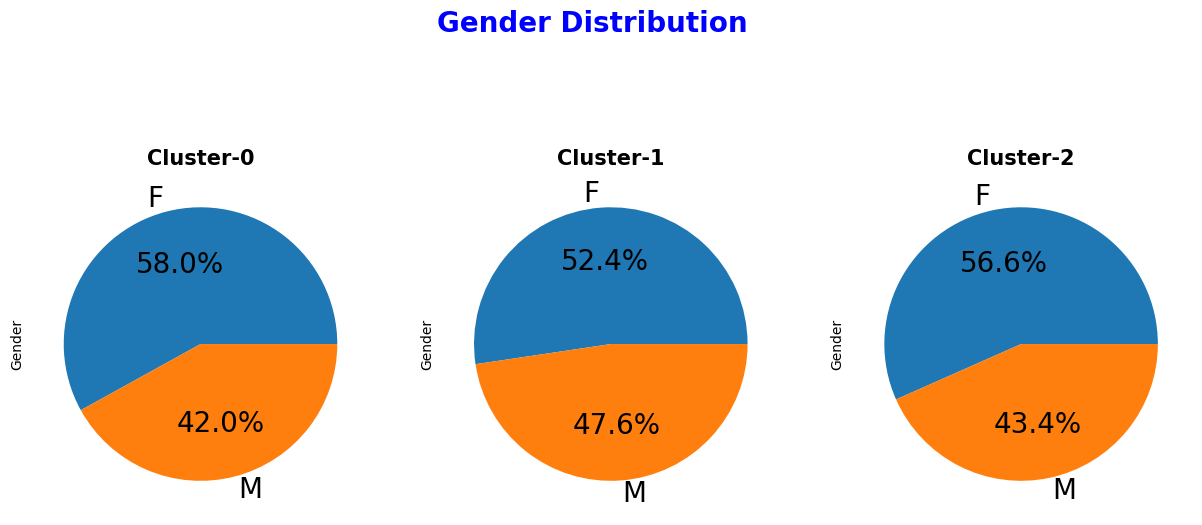

In [307]:
fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Gender Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Gender.value_counts(normalize=True).plot(kind='pie', ax=axs[0],autopct='%1.1f%%', fontsize = 20)
axs[0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1])
axs[1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[2])
axs[2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

plt.show()

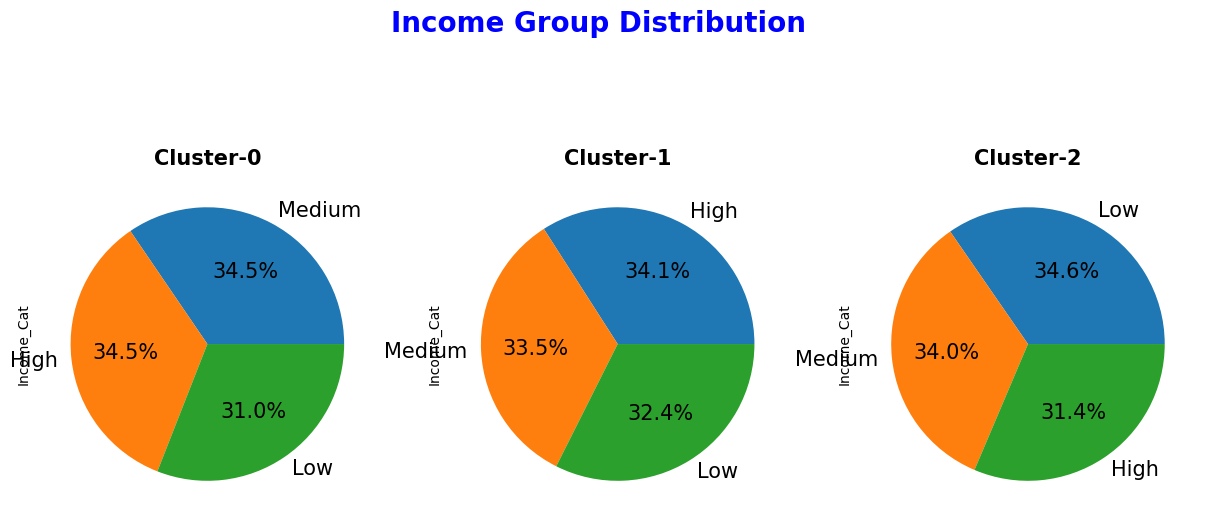

In [306]:
fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Income Group Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Income_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0],autopct='%1.1f%%', fontsize = 15)
axs[0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Income_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[1])
axs[1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Income_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[2])
axs[2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

plt.show()

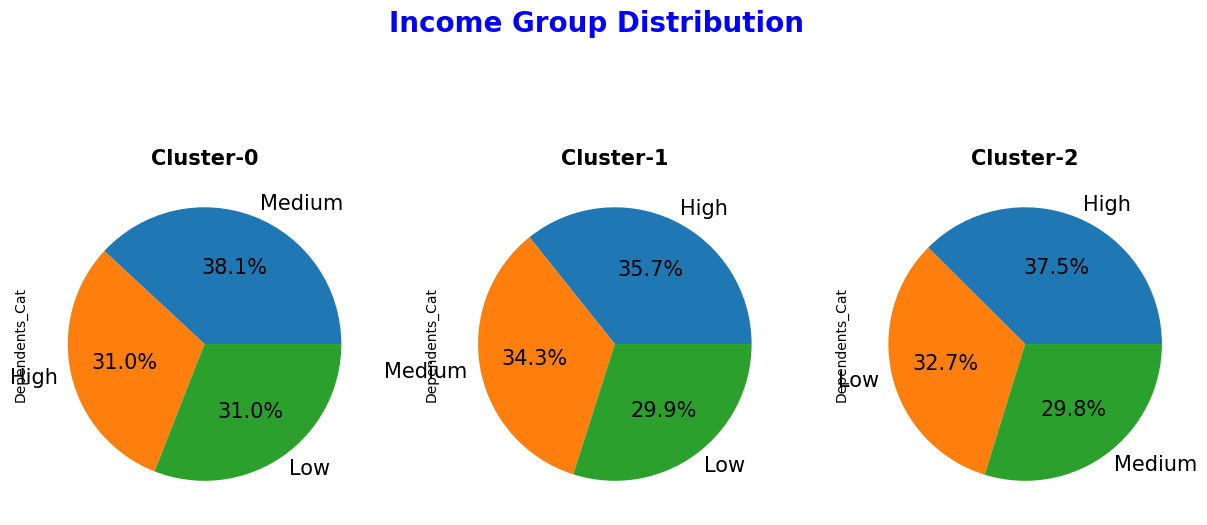

In [308]:
fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Income Group Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Dependents_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0],autopct='%1.1f%%', fontsize = 15)
axs[0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Dependents_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[1])
axs[1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Dependents_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[2])
axs[2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

plt.show()

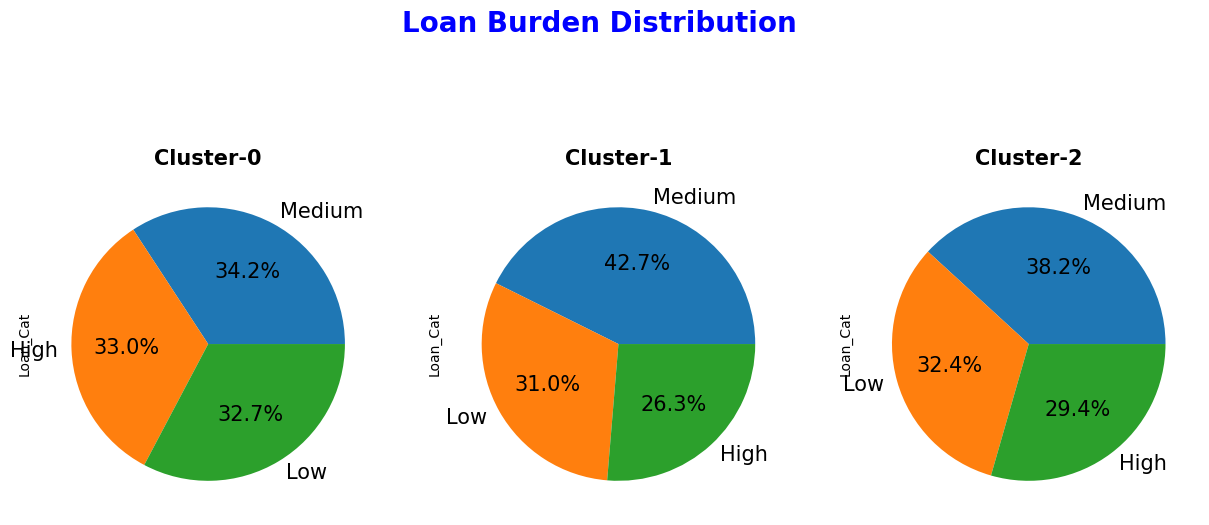

In [310]:
fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Loan Burden Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Loan_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0],autopct='%1.1f%%', fontsize = 15)
axs[0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Loan_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[1])
axs[1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Loan_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[2])
axs[2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

plt.show()

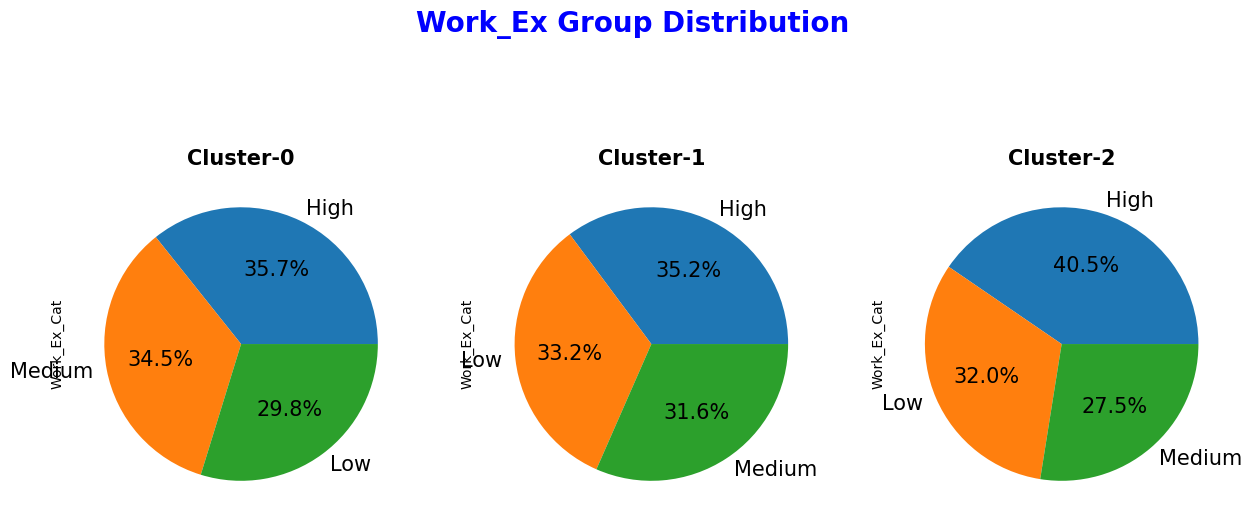

In [312]:
fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Work_Ex Group Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0],autopct='%1.1f%%', fontsize = 15)
axs[0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[1])
axs[1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[2])
axs[2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

plt.show()

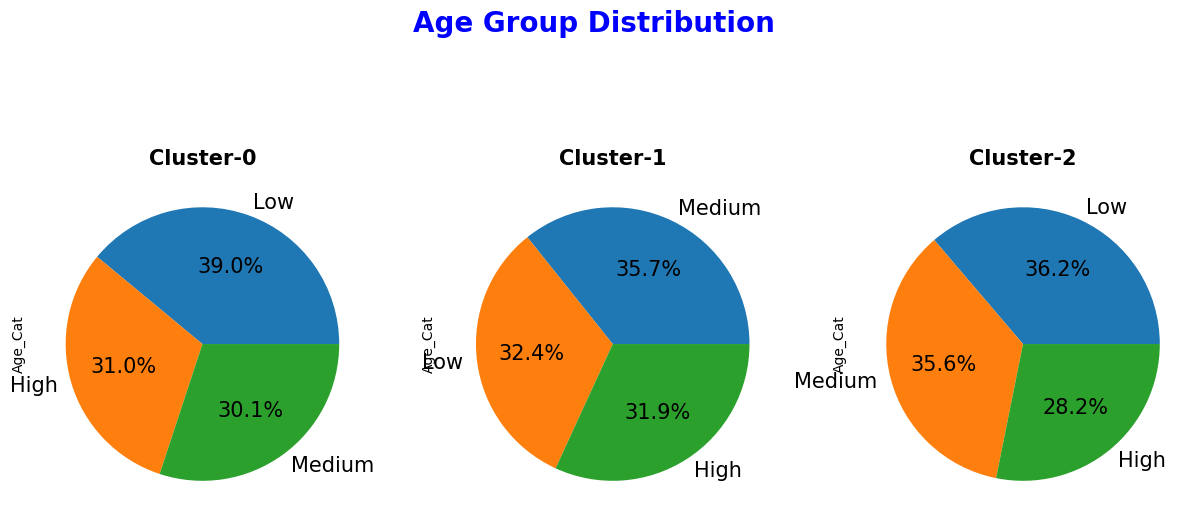

In [314]:
fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Age Group Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Age_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0],autopct='%1.1f%%', fontsize = 15)
axs[0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Age_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[1])
axs[1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Age_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[2])
axs[2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

plt.show()

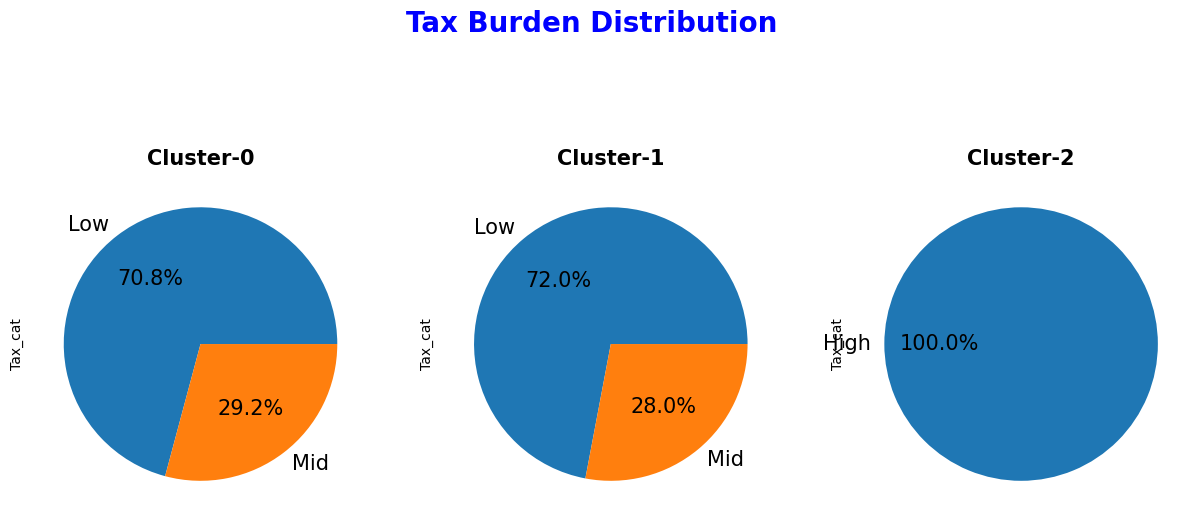

In [316]:
fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Tax Burden Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Tax_cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0],autopct='%1.1f%%', fontsize = 15)
axs[0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Tax_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[1])
axs[1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Tax_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[2])
axs[2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

plt.show()

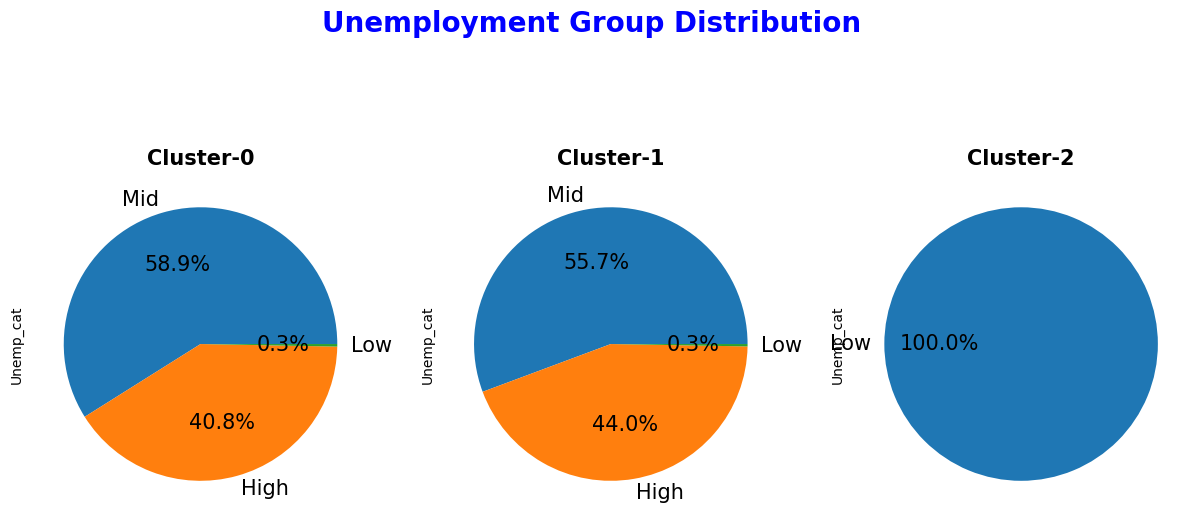

In [318]:
fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Unemployment Group Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Unemp_cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0],autopct='%1.1f%%', fontsize = 15)
axs[0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Unemp_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[1])
axs[1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Unemp_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[2])
axs[2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

plt.show()

# 5-Cluster Analysis

# K-Means

In [124]:
from sklearn.cluster import KMeans

### Determining number of clusters

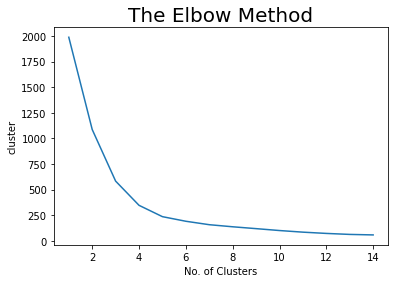

In [125]:

cluster = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(principalDf)
    cluster.append(km.inertia_)
    
plt.plot(range(1, 15), cluster)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('cluster')
plt.show()

### Visualizing cluster formation of PCA data set

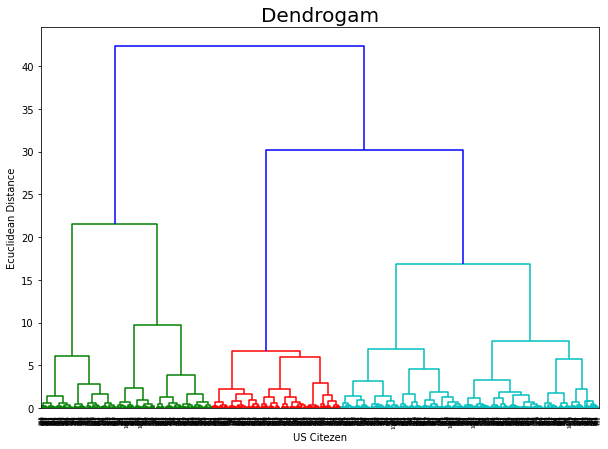

In [126]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(principalDf, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('US Citezen')
plt.ylabel('Ecuclidean Distance')
plt.show()

### K-Means for 5-Clusters on PCA Data Set

In [158]:
kmeans= KMeans(n_clusters=5)

In [159]:
pred=kmeans.fit_predict(principalDf)

In [160]:
kmeans.labels_

array([3, 3, 3, ..., 3, 3, 1], dtype=int32)

In [161]:
kmeans.cluster_centers_

array([[ 0.73785352, -1.10821302],
       [-0.0711341 ,  1.63539452],
       [-1.3353399 , -0.00930965],
       [-0.27893646, -0.56074796],
       [ 1.47765242,  0.82533695]])

### Visualizing clusters

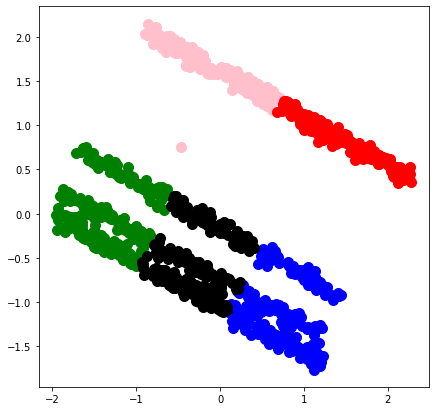

In [162]:
plt.figure(figsize=(7,7))
plt.scatter(principalDf.values[pred == 0,0], principalDf.values[pred == 0,1], s=100, color='blue')
plt.scatter(principalDf.values[pred == 1,0], principalDf.values[pred == 1,1], s=100, color='pink')
plt.scatter(principalDf.values[pred == 2,0], principalDf.values[pred == 2,1], s=100, color='green')
plt.scatter(principalDf.values[pred == 3,0], principalDf.values[pred == 3,1], s=100, color='k')
plt.scatter(principalDf.values[pred == 4,0], principalDf.values[pred == 4,1], s=100, color='r')
plt.show()

In [163]:
data.head(2)

,Spending,Income,Income_Cat,State,Dependents,Dependents_Cat,Loan_Amount,Loan_Cat,Work_Ex,Tax_cat,Work_Ex_Cat,Age,Unemp_cat,Age_Cat,Tax,Gender,Unemployment_Rate
0,8027,140907,Medium,Washington,2.0,Low,6699.0,Low,20.0,Mid,High,27.0,Mid,Low,28%,F,4.90%
1,8151,189653,High,Arizona,3.0,Medium,47402.0,High,9.0,Low,Medium,45.0,Mid,Medium,23%,M,5.90%


# Leveling Data with Cluster Name [0, 1, 2, 3, 4]

In [164]:
data1.head(2)

,Spending,Income_Cat,State,Dependents_Cat,Loan_Cat,Work_Ex_Cat,Age_Cat,Tax_cat,Gender,Unemp_cat,Cluster
0,8027,Medium,Washington,Low,Low,High,Low,Mid,F,Mid,1
1,8151,High,Arizona,Medium,High,Medium,Medium,Low,M,Mid,1


In [165]:
data1['Cluster']=pred

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
data1.head(2)

,Spending,Income_Cat,State,Dependents_Cat,Loan_Cat,Work_Ex_Cat,Age_Cat,Tax_cat,Gender,Unemp_cat,Cluster
0,8027,Medium,Washington,Low,Low,High,Low,Mid,F,Mid,3
1,8151,High,Arizona,Medium,High,Medium,Medium,Low,M,Mid,3


In [136]:
#data1.to_csv('Us Spending Clusters.csv')

### Distribution of 5-Cluster

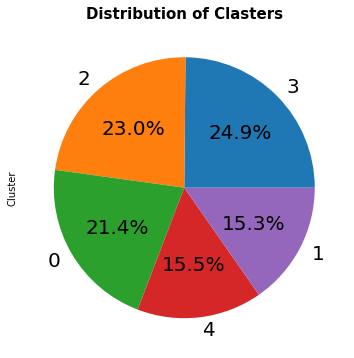

In [167]:
plt.figure(figsize=(6,6))
data1.Cluster.value_counts(normalize=True).plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title('Distribution of Clasters', fontweight='bold', fontsize=15)
plt.show()

### Checking of the cluster where Spending trend is maximum

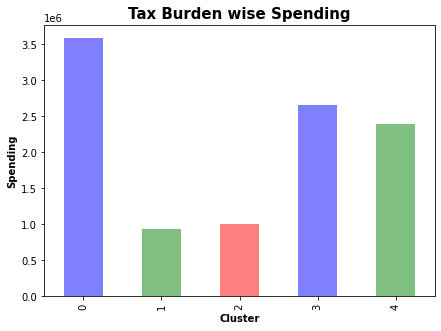

In [178]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'red'],alpha=.5)
plt.title('Tax Burden wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

### Checking clusters for Average Spending

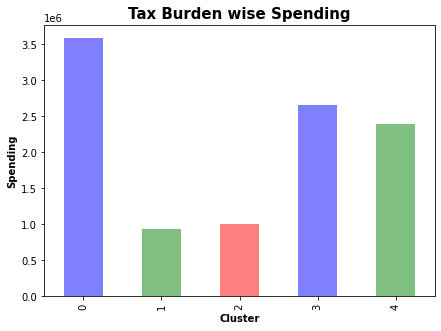

In [179]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'red'],alpha=.5)
plt.title('Tax Burden wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

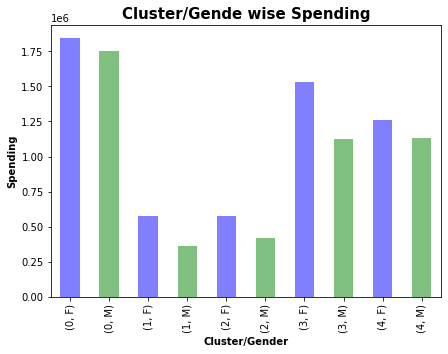

In [180]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Gender']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Gende wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Gender", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

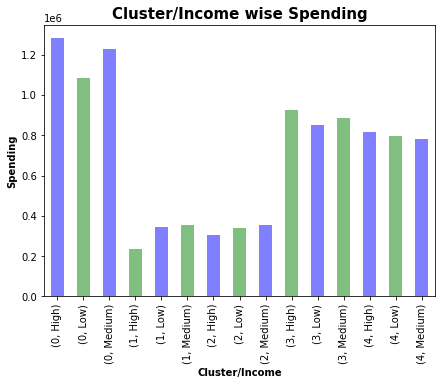

In [181]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Income_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Income wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Income", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

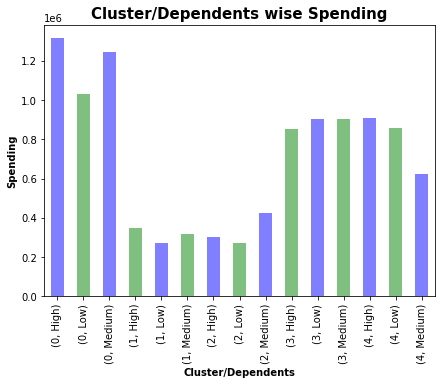

In [182]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Dependents_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Dependents wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Dependents", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

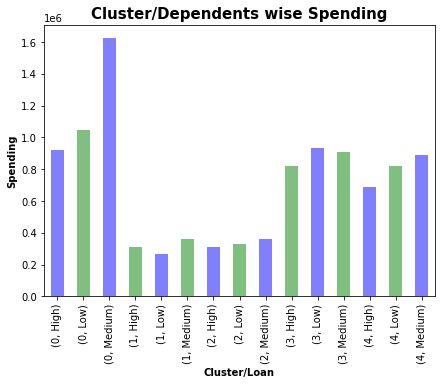

In [183]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Loan_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Dependents wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Loan", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

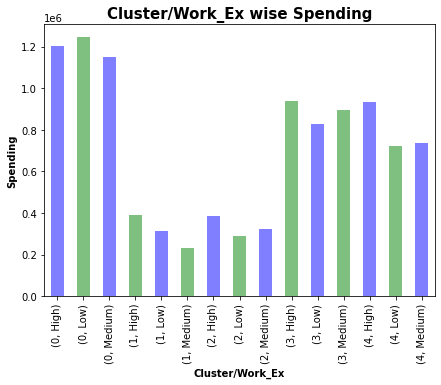

In [184]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Work_Ex_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Work_Ex wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Work_Ex", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

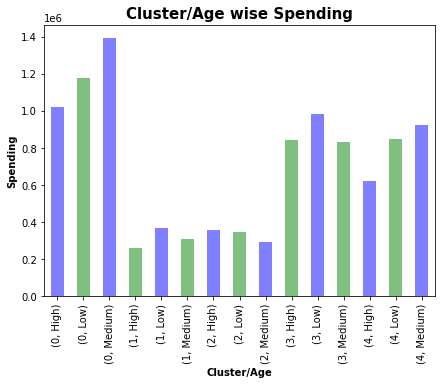

In [185]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Age_Cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Age wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Age", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

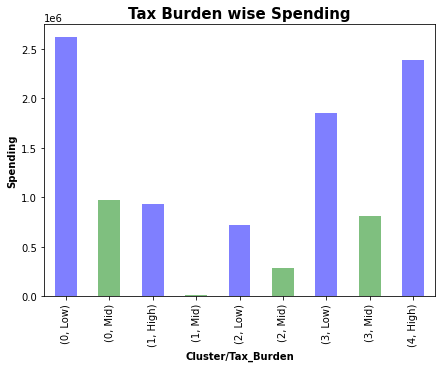

In [186]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Tax_cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Tax Burden wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Tax_Burden", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

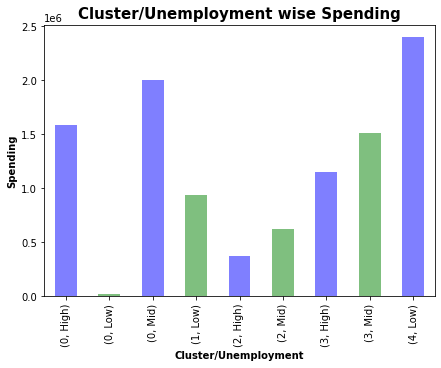

In [187]:
plt.figure(figsize=(7,5))
data1.groupby(['Cluster','Unemp_cat']).sum()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.5)
plt.title('Cluster/Unemployment wise Spending', fontweight='bold', fontsize='15')
plt.xlabel("Cluster/Unemployment", fontweight="bold")
plt.ylabel("Spending", fontweight="bold")
plt.show()

# Spending Behaviour of Different factor in Different Cluster

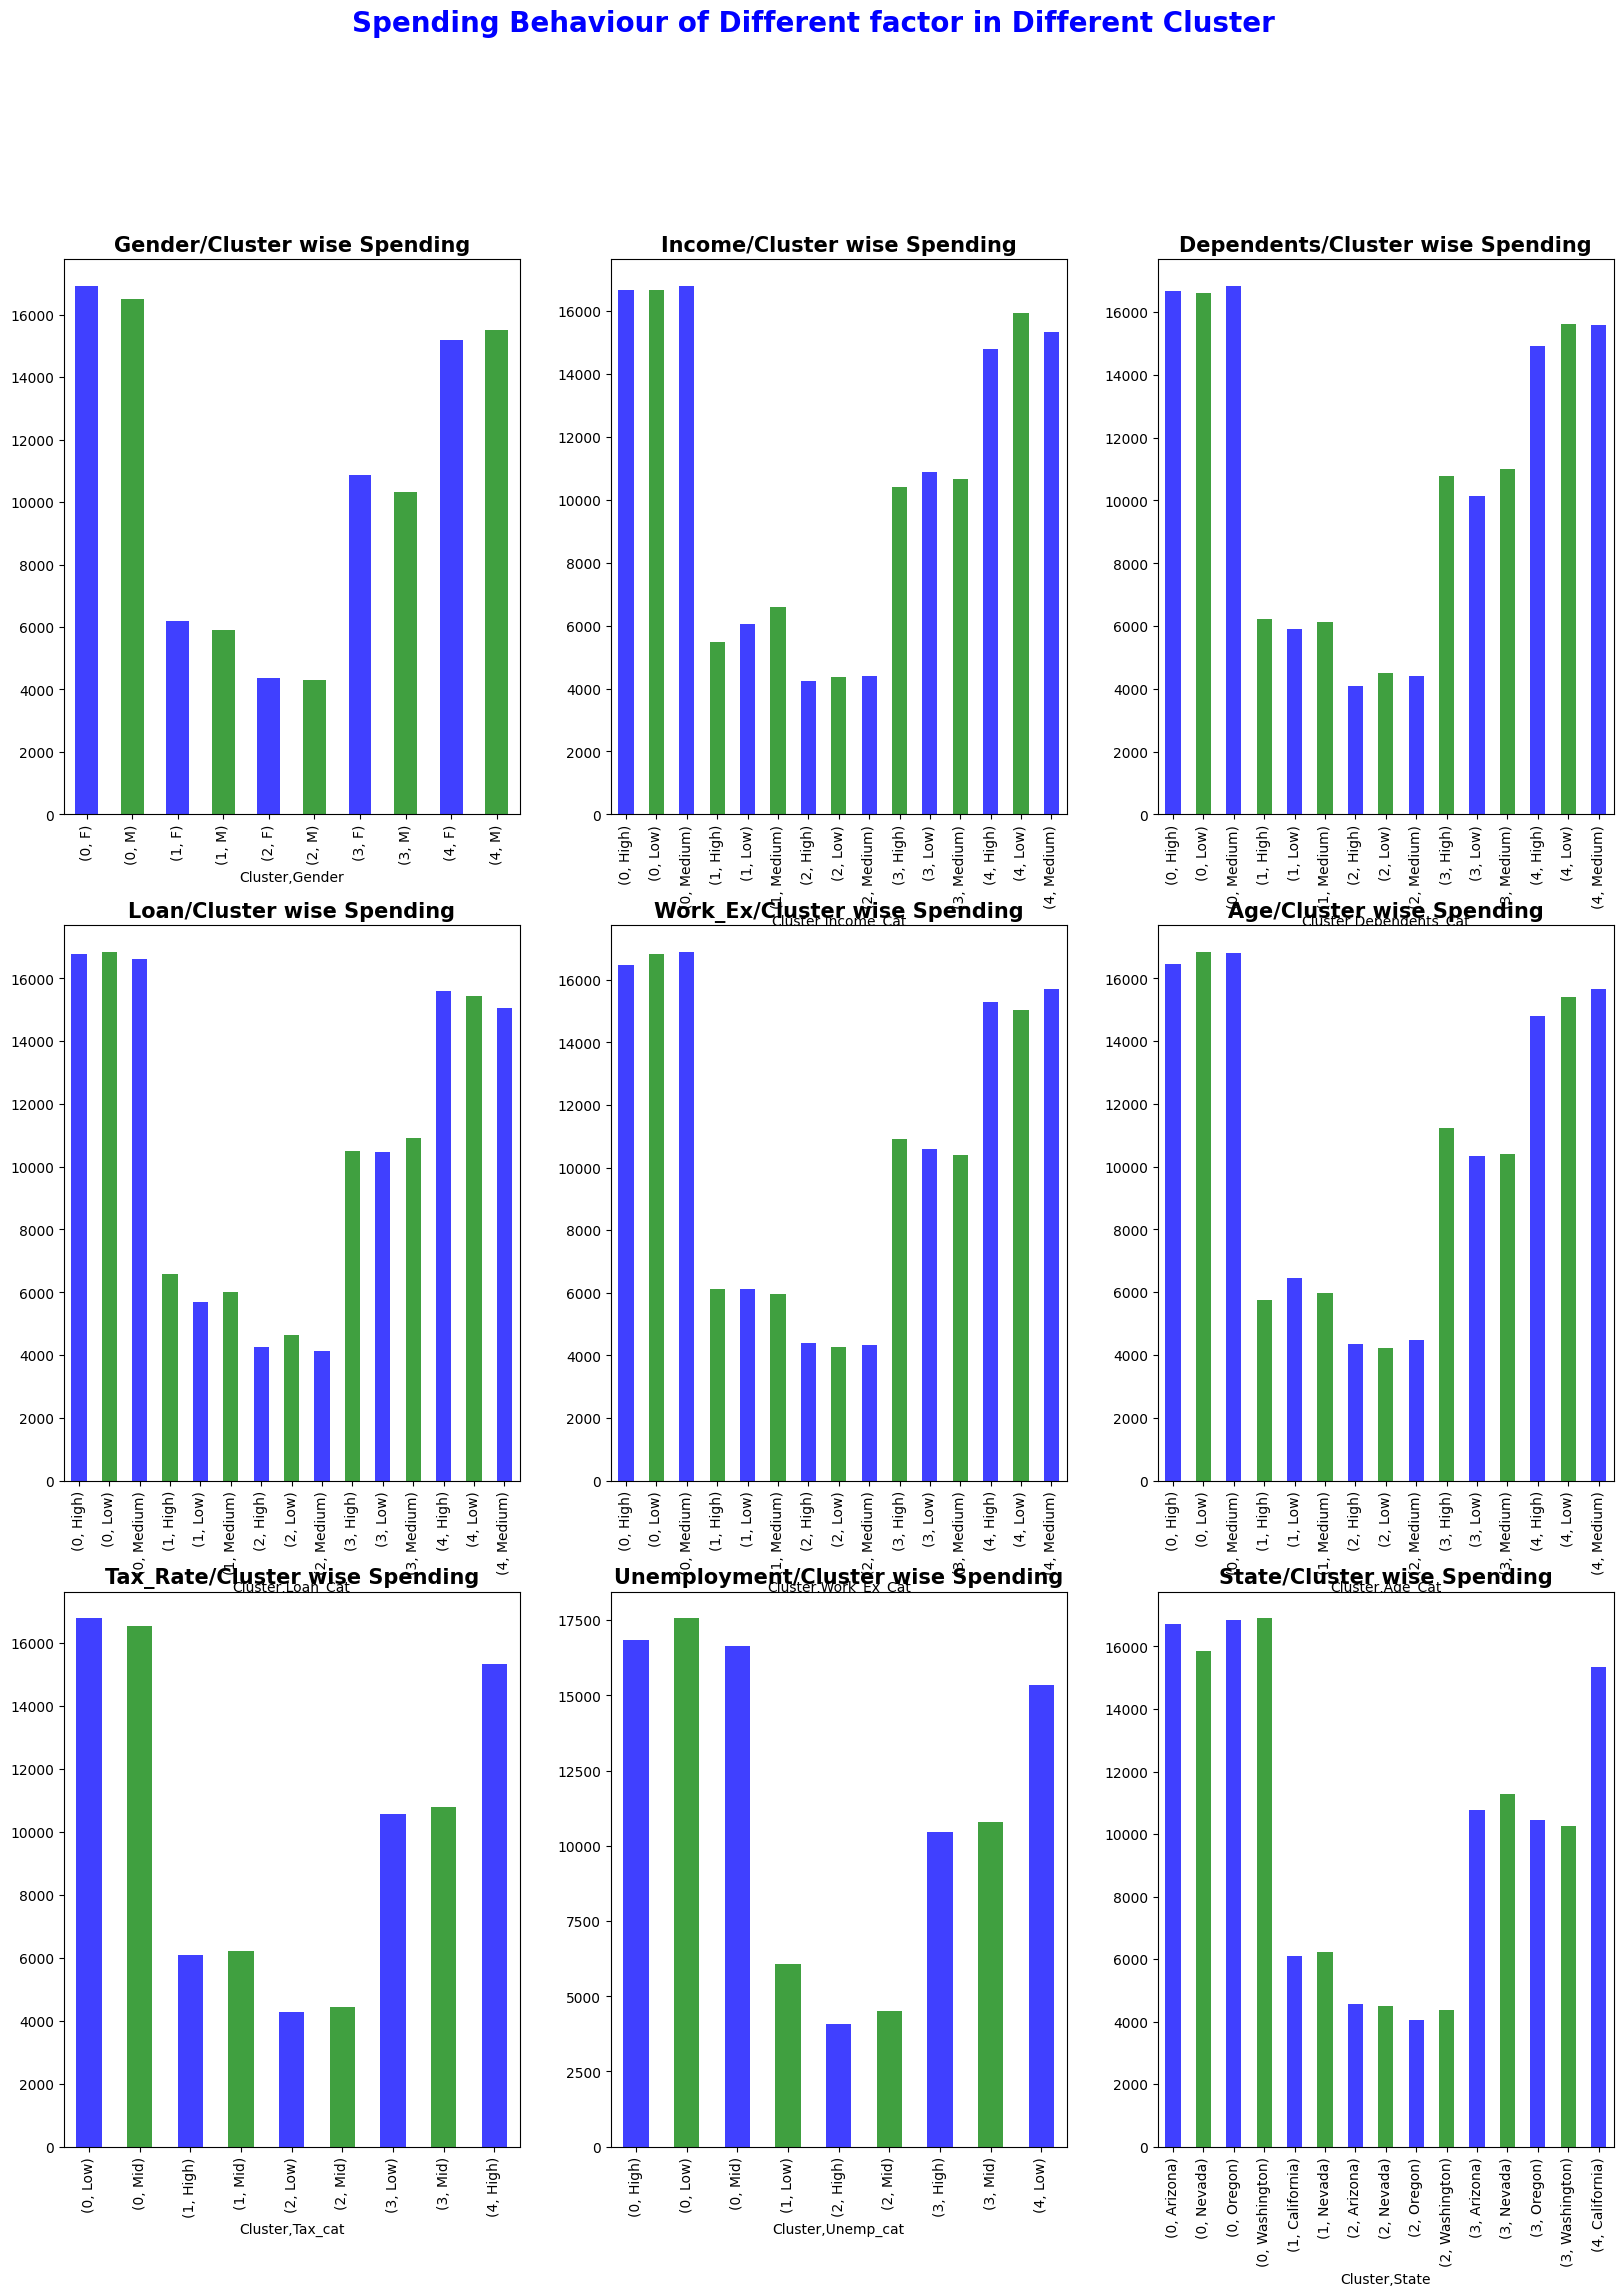

In [198]:
fig , axs = plt.subplots(nrows = 3 , ncols = 3 , figsize = (20,25), dpi=100)
fig.suptitle('Spending Behaviour of Different factor in Different Cluster',fontsize = 20,color='b', fontweight='bold')


data1.groupby(['Cluster','Gender']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75 , ax=axs[0,0])
axs[0,0].set_title("Gender/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Income_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75 , ax=axs[0,1])
axs[0,1].set_title("Income/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Dependents_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,  ax=axs[0,2])
axs[0,2].set_title("Dependents/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Loan_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[1,0])
axs[1,0].set_title("Loan/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Work_Ex_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[1,1])
axs[1,1].set_title("Work_Ex/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Age_Cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[1,2])
axs[1,2].set_title("Age/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Tax_cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[2,0])
axs[2,0].set_title("Tax_Rate/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','Unemp_cat']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[2,1])
axs[2,1].set_title("Unemployment/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')

data1.groupby(['Cluster','State']).mean()['Spending'].plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',],alpha=.75, ax=axs[2,2])
axs[2,2].set_title("State/Cluster wise Spending",color='k', fontsize = 15, fontweight='bold')
plt.show()

In [189]:
data1.columns

Index(['Spending', 'Income_Cat', 'State', 'Dependents_Cat', 'Loan_Cat',
       'Work_Ex_Cat', 'Age_Cat', 'Tax_cat', 'Gender', 'Unemp_cat', 'Cluster'],
      dtype='object')

### Findings:
    - From above we can say that Cluster-1 shows higher spending Behaviour.
    - Now, we have to check how demography of Cluster-1 is different from other cluster

# Cluster wise demographic Distribution

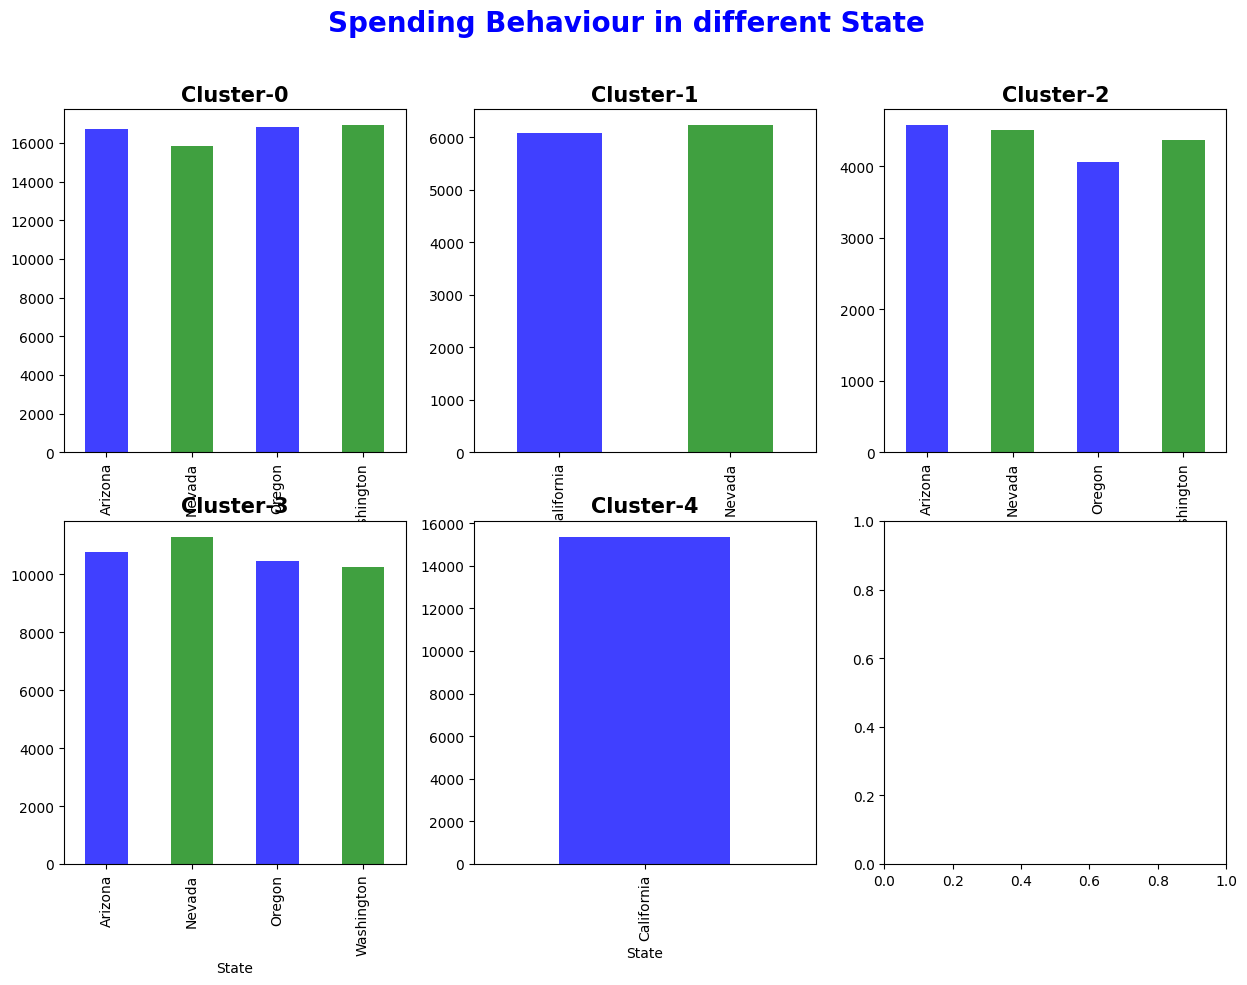

In [197]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,10), dpi=100)
fig.suptitle('Spending Behaviour in different State',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].groupby(['State'])['Spending'].mean().plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,ax=axs[0,0])
axs[0,0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].groupby(['State'])['Spending'].mean().plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,ax=axs[0,1])
axs[0,1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].groupby(['State'])['Spending'].mean().plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,ax=axs[0,2])
axs[0,2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==3].groupby(['State'])['Spending'].mean().plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,ax=axs[1,0])
axs[1,0].set_title("Cluster-3",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==4].groupby(['State'])['Spending'].mean().plot(kind='bar',color=['blue', 'green', 'blue', 'green', 'blue', 'green',], alpha=.75,ax=axs[1,1])
axs[1,1].set_title("Cluster-4",color='k', fontsize = 15, fontweight='bold')

plt.show()

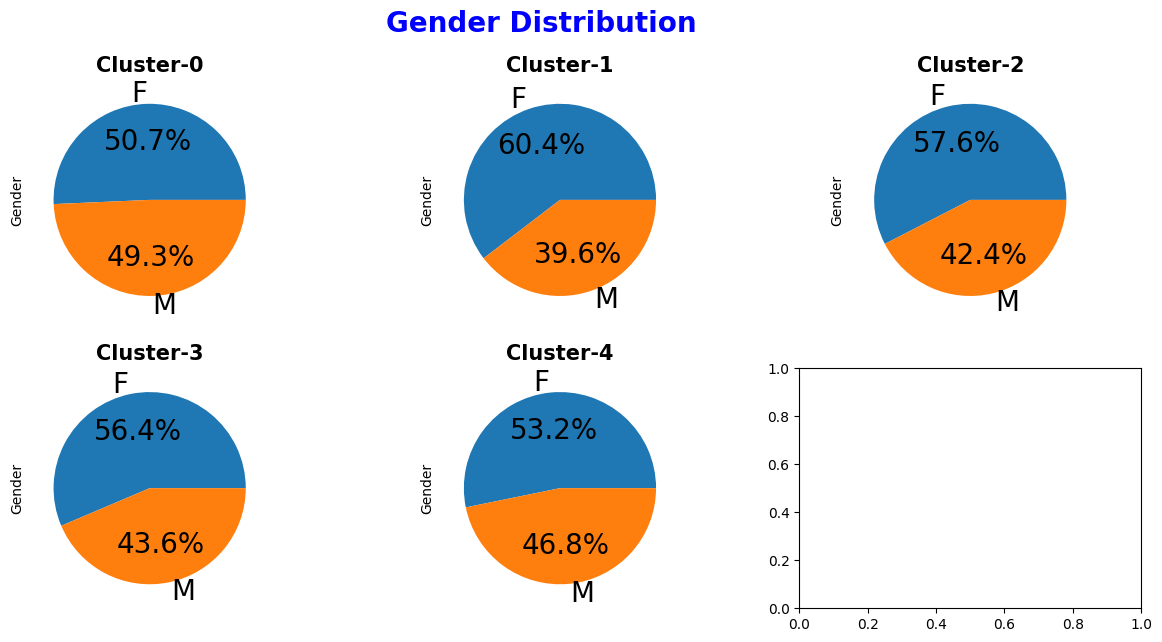

In [220]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Gender Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Gender.value_counts(normalize=True).plot(kind='pie', ax=axs[0,0],autopct='%1.1f%%', fontsize = 20)
axs[0,0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[0,1])
axs[0,1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[0,2])
axs[0,2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==3].Gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,0])
axs[1,0].set_title("Cluster-3",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==4].Gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,1])
axs[1,1].set_title("Cluster-4",color='k', fontsize = 15, fontweight='bold')


plt.show()

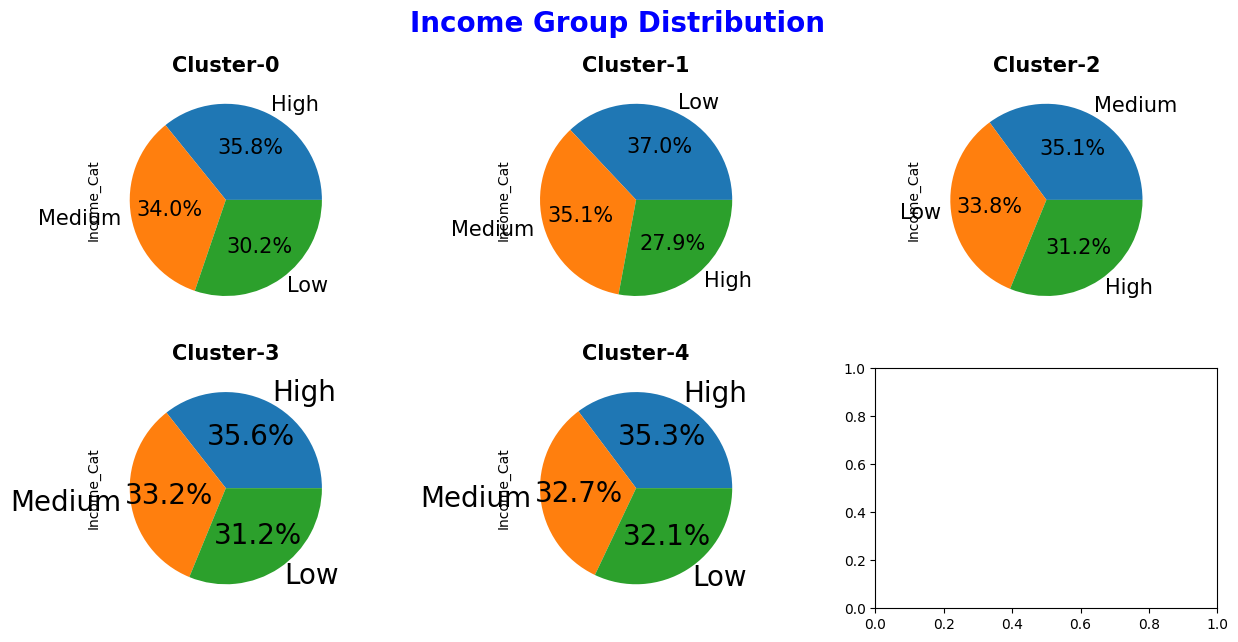

In [219]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Income Group Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Income_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0,0],autopct='%1.1f%%', fontsize = 15)
axs[0,0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Income_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,1])
axs[0,1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Income_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,2])
axs[0,2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==3].Income_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,0])
axs[1,0].set_title("Cluster-3",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==4].Income_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,1])
axs[1,1].set_title("Cluster-4",color='k', fontsize = 15, fontweight='bold')

plt.show()

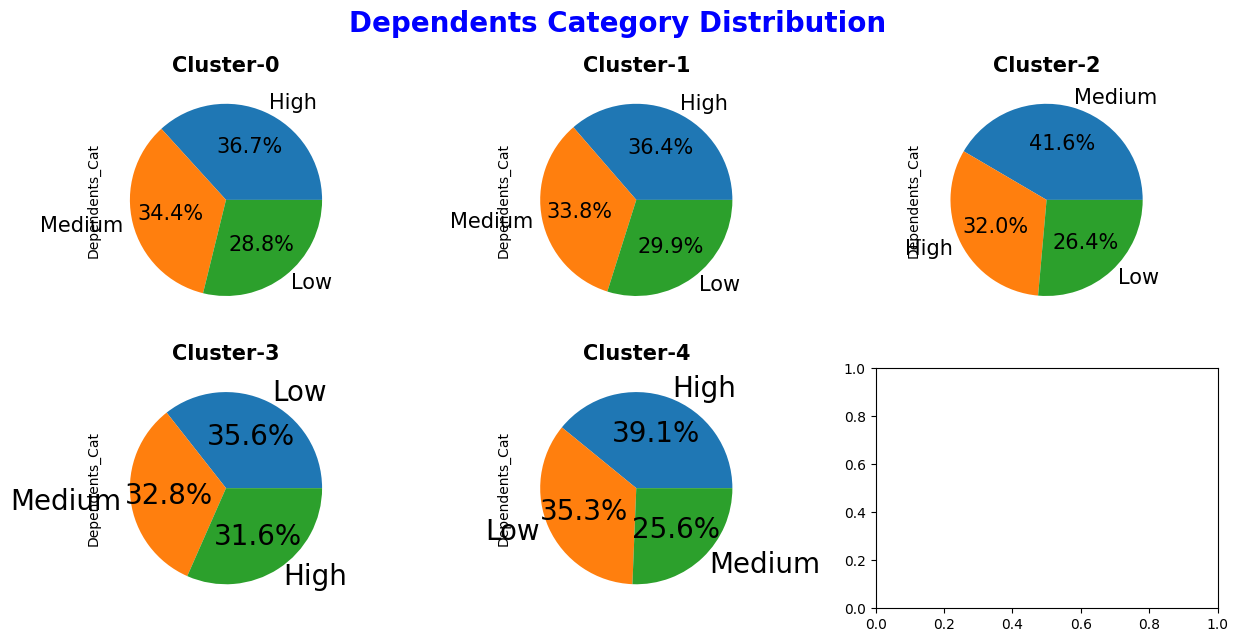

In [218]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Dependents Category Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Dependents_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0,0],autopct='%1.1f%%', fontsize = 15)
axs[0,0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Dependents_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,1])
axs[0,1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Dependents_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,2])
axs[0,2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==3].Dependents_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,0])
axs[1,0].set_title("Cluster-3",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==4].Dependents_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,1])
axs[1,1].set_title("Cluster-4",color='k', fontsize = 15, fontweight='bold')

plt.show()

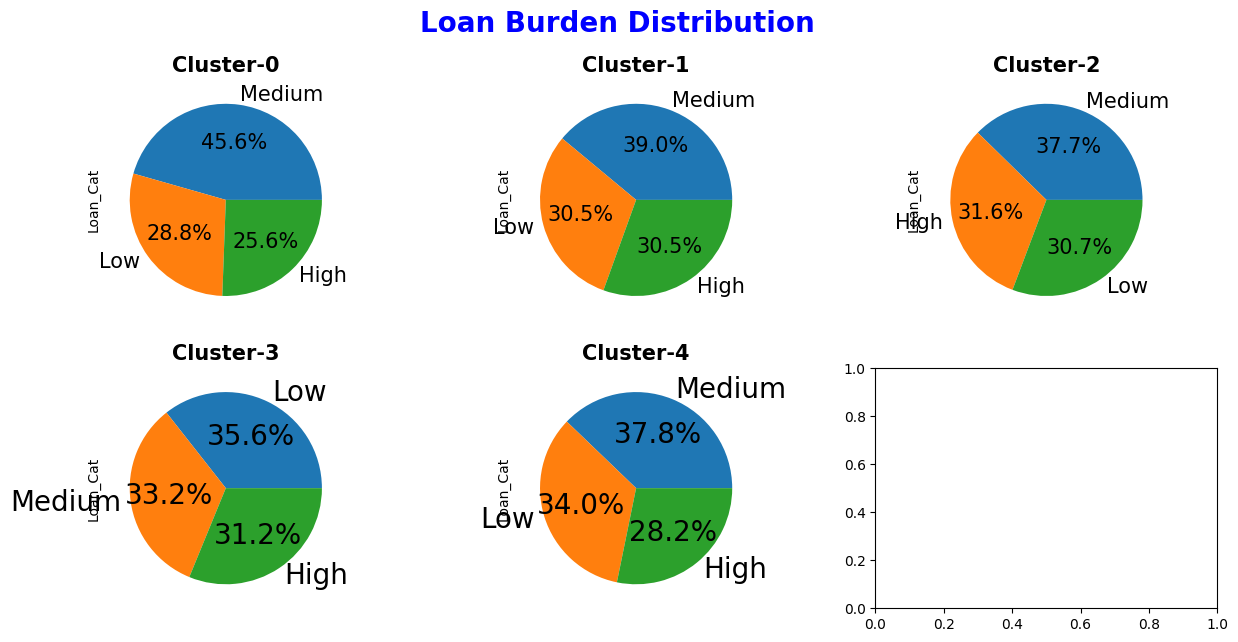

In [217]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Loan Burden Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Loan_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0,0],autopct='%1.1f%%', fontsize = 15)
axs[0,0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Loan_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,1])
axs[0,1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Loan_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,2])
axs[0,2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==3].Loan_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,0])
axs[1,0].set_title("Cluster-3",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==4].Loan_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,1])
axs[1,1].set_title("Cluster-4",color='k', fontsize = 15, fontweight='bold')


plt.show()

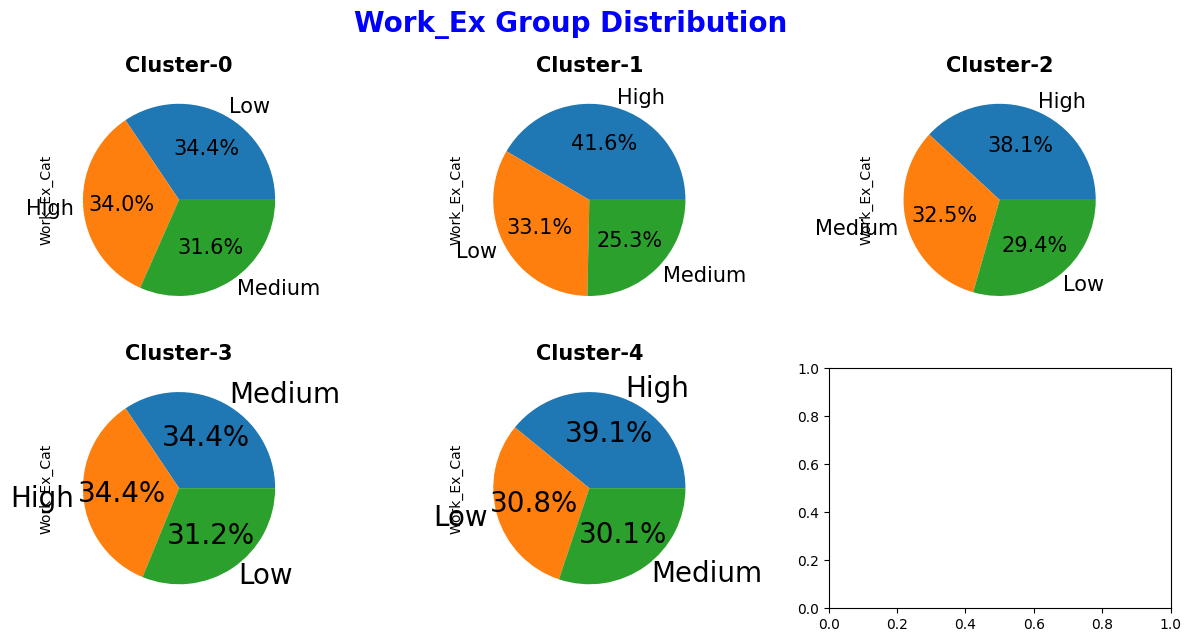

In [216]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Work_Ex Group Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0,0],autopct='%1.1f%%', fontsize = 15)
axs[0,0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,1])
axs[0,1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,2])
axs[0,2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==3].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,0])
axs[1,0].set_title("Cluster-3",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==4].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,1])
axs[1,1].set_title("Cluster-4",color='k', fontsize = 15, fontweight='bold')

plt.show()

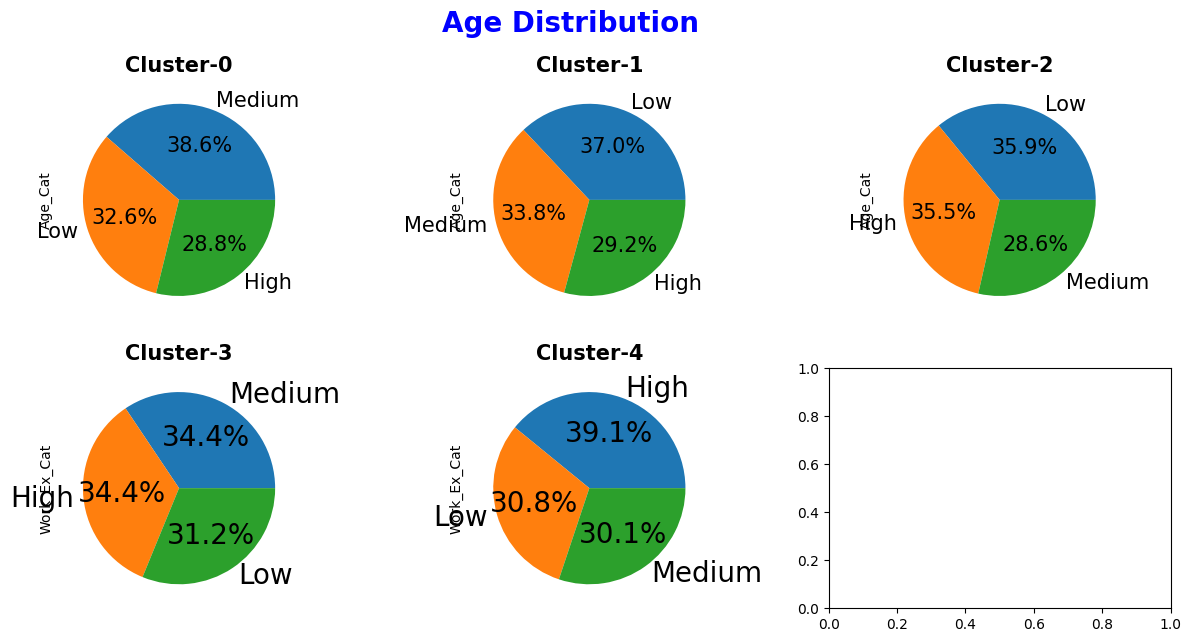

In [224]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Age Distribution',fontsize = 20,color='b', fontweight='bold')


data1[data1['Cluster']==0].Age_Cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0,0],autopct='%1.1f%%', fontsize = 15)
axs[0,0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')


data1[data1['Cluster']==1].Age_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,1])
axs[0,1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Age_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,2])
axs[0,2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==3].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,0])
axs[1,0].set_title("Cluster-3",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==4].Work_Ex_Cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,1])
axs[1,1].set_title("Cluster-4",color='k', fontsize = 15, fontweight='bold')

plt.show()

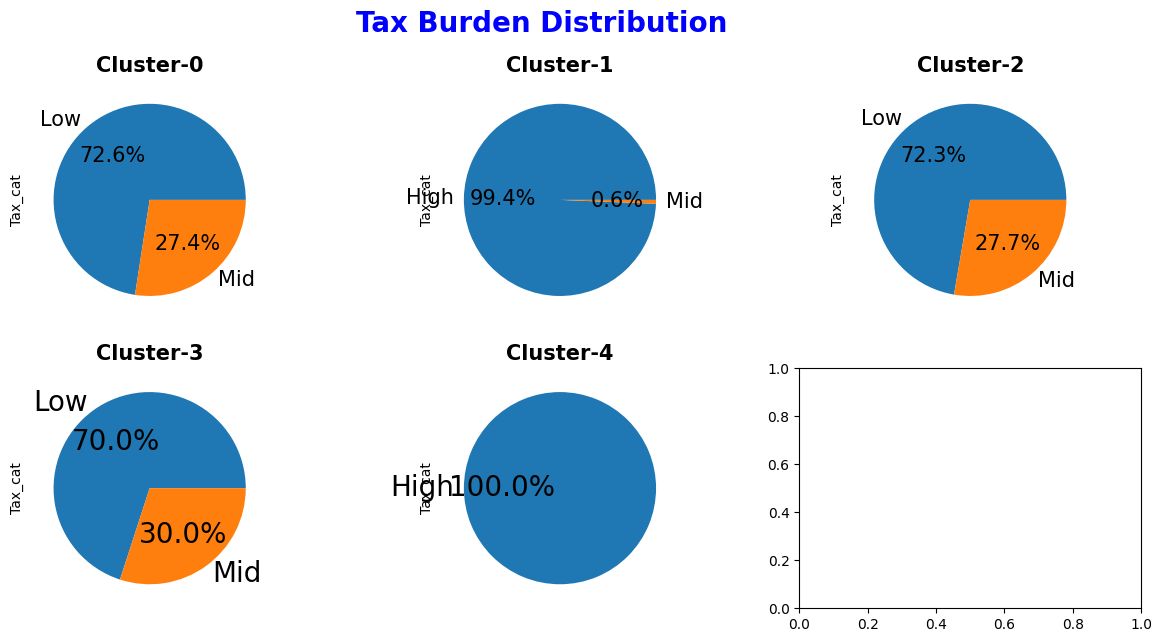

In [227]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Tax Burden Distribution',fontsize = 20,color='b', fontweight='bold')

data1[data1['Cluster']==0].Tax_cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0,0],autopct='%1.1f%%', fontsize = 15)
axs[0,0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==1].Tax_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,1])
axs[0,1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Tax_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,2])
axs[0,2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==3].Tax_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,0])
axs[1,0].set_title("Cluster-3",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==4].Tax_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,1])
axs[1,1].set_title("Cluster-4",color='k', fontsize = 15, fontweight='bold')

plt.show()

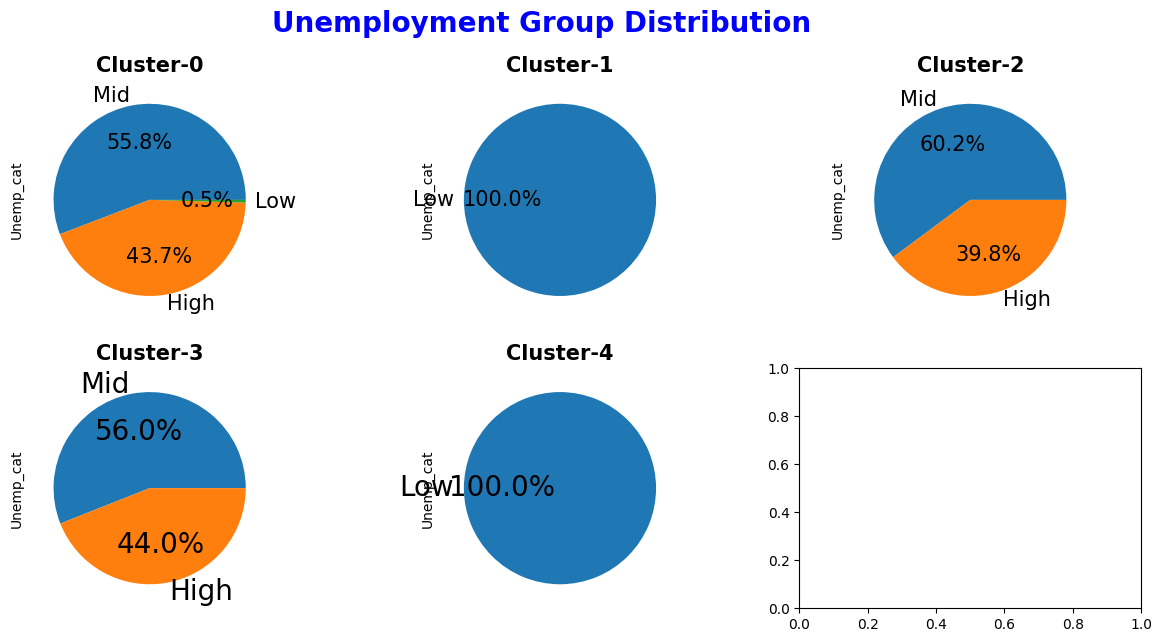

In [226]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,7), dpi=100)
fig.suptitle('Unemployment Group Distribution',fontsize = 20,color='b', fontweight='bold')

data1[data1['Cluster']==0].Unemp_cat.value_counts(normalize=True).plot(kind='pie', ax=axs[0,0],autopct='%1.1f%%', fontsize = 15)
axs[0,0].set_title("Cluster-0",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==1].Unemp_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,1])
axs[0,1].set_title("Cluster-1",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==2].Unemp_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 15, ax=axs[0,2])
axs[0,2].set_title("Cluster-2",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==3].Unemp_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,0])
axs[1,0].set_title("Cluster-3",color='k', fontsize = 15, fontweight='bold')

data1[data1['Cluster']==4].Unemp_cat.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ax=axs[1,1])
axs[1,1].set_title("Cluster-4",color='k', fontsize = 15, fontweight='bold')

plt.show()